# Исследование объявлений о продаже квартир

## Цели работы и исходные данные 

**Цель данной работы** - установить параметры, на основании которых определяется рыночная стоимость объектов недвижимости.  

Это позволит создать автоматизированную систему, отслеживающую аномалии и мошенническую деятельность.

**Предоставленные данные:**  

Для анализа предоставлен архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет (таблица csv и пояснения к ней). По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Таблица состоит из следующих столбцов: 
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony — число` балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

**Техническое задание**

Для установки параметров, на основании которых определяется рыночная стоимость объектов недвижимости, нужно выполнить следующие задачи:
1. Изучить следующие параметры объектов:
- общая площадь
- жилая площадь
- площадь кухни
- цена объект
- количество комнат
- высота потолков
- этаж квартиры
- тип этажа квартиры («первый», «последний», «другой»)
- общее количество этажей в доме
- расстояние до центра города в метрах
- расстояние до ближайшего аэропорта
- расстояние до ближайшего парка
- день и месяц публикации объявления.
 
Построить отдельные гистограммы для каждого из этих параметров. 

2. Изучить, как быстро продавались квартиры (столбец `days_exposition`). 
 - Построить гистограмму.
 - Посчитать среднее и медиану.
 - Описать сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?
3. Изучить какие факторы больше всего влияют на общую (полную) стоимость объекта. Зависит ли цена от:
 - общей площади;
 - жилой площади;
 - площади кухни;
 - количества комнат;
 - этажа, на котором расположена квартира (первый, последний, другой);
 - даты размещения (день недели, месяц, год).
4. Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра.
5. Выделите квартиры в Санкт-Петербурге и вычислить среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.


**Этапы работы:**  

1. Оценка качества данных, выявление недочетов и ошибок.
2. Предварительная обработка данных, исправление обнаруженных ошибок, исправление аномалии, расчет необходимые для анализа характеристики.
3. Анализ получившейся информации согласно техническому заданию и определение параметров, от которых завиcит рыночная стоимость объектов недвижимости.

## Библиотеки
Загрузим необходимые для работы библиотеки языка Python:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import difflib

from datetime import timedelta, datetime
from IPython.display import display_html
from itertools import chain,cycle

In [2]:
# функция для вывода нескольких наборов данных в одной строке:

def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2 style="text-align: center;">{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

## Предварительная обработка

### Основная информация о наборе данных

Загрузим предоставленные данные об объектах недвижимости, а также таблицу с перечнем населенных пунктов, входящих в состав Санкт-Петербурга (созданную на основе открытых источников).

In [3]:
# Архив объявлений о продаже квартир
df = pd.read_csv('real_estate_data.csv', sep='\t') 

# Населённые пункты в составе Санкт-Петербурга
df_spb = pd.read_csv('localities_in_spb.csv')

Выведем несколько случайных строк из таблицы с объявлениями и информацию о ней.

In [4]:
df.sample(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21113,4,2100000.0,42.0,2018-12-10T00:00:00,1,2.5,5.0,17.1,2,NaN,...,8.00,NaN,посёлок Жилгородок,NaN,NaN,NaN,NaN,NaN,NaN,32.0
16812,13,4635000.0,37.0,2019-03-15T00:00:00,1,NaN,20.0,17.8,2,NaN,...,11.51,1.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,24.0
15921,4,3980000.0,41.3,2017-05-04T00:00:00,2,NaN,5.0,27.0,2,False,...,7.00,1.0,Санкт-Петербург,41748.0,14252.0,0.0,NaN,0.0,NaN,81.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В данных есть пропуски, типы данных не везде соответствуют предполагаемым. Не все столбцы названы корректно.

Изменим названия некоторых столбцов так, чтобы они соответствовали стилистическим нормам и смысловому наполнению.

In [6]:
df = df.rename(columns={'airports_nearest': 'airport_distance', 
                        'cityCenters_nearest': 'city_center_distance', 
                        'parks_nearest': 'park_distance', 
                        'ponds_nearest': 'pond_distance', 
                        'floors_total': 'total_floors', 
                        'days_exposition': 'expo_days_count', 
                        'balcony': 'balcony_count', 
                        'rooms': 'rooms_count', 
                        'total_images': 'total_images_count', 
                        'open_plan': 'is_open_plan', 
                        'studio': 'is_studio', 
                        'parks_around3000': 'parks_count', 
                        'ponds_around3000': 'ponds_count', 
                        'locality_name': 'locality'
                       })
df.columns

Index(['total_images_count', 'last_price', 'total_area',
       'first_day_exposition', 'rooms_count', 'ceiling_height', 'total_floors',
       'living_area', 'floor', 'is_apartment', 'is_studio', 'is_open_plan',
       'kitchen_area', 'balcony_count', 'locality', 'airport_distance',
       'city_center_distance', 'parks_count', 'park_distance', 'ponds_count',
       'pond_distance', 'expo_days_count'],
      dtype='object')

Сохраним в отдельную переменную количество строк в изначально предоставленных данных.

In [7]:
rows_count = df.shape[0]
print('Количество строк в предоставленном наборе данных:', rows_count)

Количество строк в предоставленном наборе данных: 23699


__Пропуски по столбцам__

In [8]:
print('Доля пустых значений по столбцам в процентах:')
(df.isna().mean()*100)[(df.isna().mean()*100) != 0].sort_values(ascending=False)

Доля пустых значений по столбцам в процентах:


is_apartment            88.290645
park_distance           65.909954
pond_distance           61.559559
balcony_count           48.605426
ceiling_height          38.799105
airport_distance        23.384953
city_center_distance    23.287902
parks_count             23.283683
ponds_count             23.283683
expo_days_count         13.422507
kitchen_area             9.612220
living_area              8.029875
total_floors             0.362885
locality                 0.206760
dtype: float64

__Наличие дубликатов__

Без указания адресов квартир определить наличие дублирующихся объектов недвижимости представляется мало возможным.    

Определим, есть ли в наборе данных явные дубликаты (полностью совпадающие строки).

In [9]:
print('Количество явных дубликатов:', df.duplicated().sum())

Количество явных дубликатов: 0


### Тематические блоки

Мы получили таблицу с 22 столбцами. Они содержат следующие данные.

Географическая информация, заполненная автоматически:

  - `airport_distance` — расстояние до ближайшего аэропорта в метрах (м) 
  - `city_center_distance` — расстояние до центра города (м)
  - `parks_count` — число парков в радиусе 3 км
  - `park_distance` — расстояние до ближайшего парка (м)
  - `ponds_count` — число водоёмов в радиусе 3 км
  - `pond_distance` — расстояние до ближайшего водоёма (м)
  
Географическая информация, заполненная пользователем:

  - `locality` — тип и название населённого пункта
     
Информация об основных характеристиках квартиры:
  
  - `total_area` — площадь квартиры в квадратных метрах (м²)
  - `living_area` — жилая площадь в квадратных метрах (м²)
  - `kitchen_area` — площадь кухни в квадратных метрах (м²)
  - `ceiling_height` — высота потолков (м)
  - `rooms_count` — число комнат
  - `balcony_count` — число балконов  
  - `is_apartment` — апартаменты (булев тип)  
  - `is_open_plan` — свободная планировка (булев тип)
  - `is_studio` — квартира-студия (булев тип)
  - `floor` — этаж
  - `total_floors` — всего этажей в доме
  
Информация о цене квартиры и публикации о продаже: 
  
  - `last_price` — цена на момент снятия с публикации    
  - `expo_days_count` — сколько дней было размещено объявление (от публикации до снятия)  
  - `first_day_exposition` — дата публикации 
  - `total_images_count` — число фотографий квартиры в объявлении
 

Чтобы информация воспринималась лучше, при дальнейшей обработке и анализе разобьем данные на следующие группы: 
- географические данные
- параметры квартиры
- информация об объявлении о продаже.   

In [10]:
# столбцы с географическими данными
geo_data = ['locality', 'airport_distance', 'city_center_distance', 'parks_count', 
            'park_distance', 'ponds_count', 'pond_distance']
# столбцы с параметрами квартиры
flat_data = ['total_area', 'rooms_count', 'ceiling_height', 'total_floors', 
             'living_area', 'floor', 'is_apartment', 'is_studio', 'is_open_plan', 
             'kitchen_area', 'balcony_count']
# столбцы с информацией о публикации
public_data = ['total_images_count', 'last_price', 'first_day_exposition', 'expo_days_count']

На этапе предобработки для каждой группы проверим отдельно количественные и категориальные данные.

Для количественных данных используем функцию describe.  
Для категориальных данных выведем уникальные значения.  
Исправим найденные недочеты.

Определим также за какой период собраны публикации.

### Географические данные

#### Названия населенных пунктов

Просмотрим уникальные названия населенных пунктов.

In [11]:
df_names = df.groupby(by='locality')['last_price'].count().reset_index().rename(columns={'last_price': 'count'})
df_names['locality'].unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

1. В названиях населенных пунктов присутствуют неявные дубликаты из-за использования е или ё в одних и тех же словах (поселок и посёлок). Возможны также другие неявные дубликаты.
2. Столбец содержит информацию как о названии, так и о типе населенного пункта. Перепишем эти данные в отдельные столбцы.
3. Некоторые населенные пункты, указанные в столбце `locality`, входят в административно-территориальные границы Санкт-Петербурга. Создадим отдельный столбец с информацией о том, находится ли жилье на территории Санкт-Петербурга.

__Неявные дубликаты в названиях населенных пунктов__

Заменим "ё" на "е".

In [12]:
df['locality'] = df['locality'].str.replace('ё', 'е')
#df['locality'] = df['locality'].str.replace('при железнодорожной ', '')
df_namelist = df.dropna(subset=['locality']).reset_index(drop=True)
sorted(df_namelist['locality'].unique())

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалево',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Будогощь',
 'городской поселок Виллози',
 'городской поселок Лесогорский',
 'городской поселок Мга',
 'городской поселок Назия',
 'городской поселок Новоселье',
 'городской поселок Павлово',
 'городской поселок Рощино',
 'городской поселок Свирьстрой',
 'городской поселок Советский',
 'городской поселок Федоровское',
 'городской поселок Янино-1',
 'деревня

Выпишем из получившегося списка типы населенных пунктов, представленных в наших данных, для лучшего представления об имеющейся информации.

In [13]:
locality_type_list = ['городской поселок', 'деревня', 'коттеджный поселок', 'поселок городского типа', 
                      'садоводческое некоммерческое товарищество', 'садовое товарищество', 'поселок станции', 
                      'поселок при железнодорожной станции', 'поселок', 'село']

__Типы и названия населенных пунктов__

Создадим столбец с названиями населенных пунктов `locality_name`.

In [14]:
locality_type_list_space = list(map(lambda x: x + ' ', locality_type_list))

In [15]:
df['locality_name'] = df['locality']
for name in locality_type_list_space:
    df['locality_name'] = df['locality_name'].str.replace(name, '')

df['locality_name'].head()

0    Санкт-Петербург
1             Шушары
2    Санкт-Петербург
3    Санкт-Петербург
4    Санкт-Петербург
Name: locality_name, dtype: object

Создадим столбец с типами населенных пунктов `locality_type`.

In [16]:
df['locality_type'] = df['locality']
for name in locality_type_list:
    df.loc[(df['locality_type'].str.find(name) == 0) 
           & (df['locality_type'] != 'поселок городского типа') 
           & (df['locality_type'] != 'поселок станции') 
           & (df['locality_type'] != 'поселок при железнодорожной станции'), 'locality_type'] = name
df.loc[~((df['locality_type'].str.contains('село')) 
        | (df['locality_type'].str.contains('деревня')) 
        | (df['locality_type'].str.contains('садово'))),
        'locality_type'] = 'город'
       
sorted(df['locality_type'].unique())

['город',
 'городской поселок',
 'деревня',
 'коттеджный поселок',
 'поселок',
 'поселок городского типа',
 'поселок при железнодорожной станции',
 'поселок станции',
 'садоводческое некоммерческое товарищество',
 'садовое товарищество',
 'село']

__Поиск и замена неявных дубликатов в названиях населенных пунктов__

В данных встречаются случаи, когда одному названию поселения соответствуют несколько типов населенных пунктов (например, "городской поселок" и "поселок городского типа"). Сгруппируем данные по столбцу `locality_name` и отфильтруем те названия, которым соответствует 2 и более типа населенных пунктов.

In [17]:
duplicate_name = df.groupby('locality_name')['locality_type'].nunique().reset_index()
duplicate_name_list = list(duplicate_name[duplicate_name['locality_type'] > 1]['locality_name'])

In [18]:
df.query('locality_name in @duplicate_name_list').groupby(['locality_name', 'locality_type'])['locality'].first()

locality_name  locality_type                      
Большая Ижора  городской поселок                                        городской поселок Большая Ижора
               поселок городского типа                            поселок городского типа Большая Ижора
Вещево         поселок при железнодорожной станции           поселок при железнодорожной станции Вещево
               поселок станции                                                   поселок станции Вещево
Гарболово      деревня                                                                деревня Гарболово
               поселок                                                                поселок Гарболово
Громово        поселок                                                                  поселок Громово
               поселок станции                                                  поселок станции Громово
Зимитицы       деревня                                                                 деревня Зимитицы
             

Анализ получившейся таблицы показал, что возможны следующие причины появления таких дубликатов:

1. "Поселок городского типа" и "городской поселок" - это два разных варианта названия одного и того же вида населенного пункта. Чтобы устранить неявные дубликаты в этом случае, заменим названия "городской поселок" на "поселок городского типа.   

2. Тип населенного пункта в части объявлений указан ошибочно. Исправим такие случаи.

3. Два населенных пункта с разными типами имеют одно и тоже название. Этот случай не нужно исправлять.

Заменим "городской поселок" на "Поселок городского типа", а "поселок станции" на "поселок при железнодорожной станции".

In [19]:
df['locality'] = df['locality'].str.replace('городской поселок', 'поселок городского типа')
df['locality_type'] = df['locality_type'].str.replace('городской поселок', 'поселок городского типа')

df['locality'] = df['locality'].str.replace('поселок станции', 'поселок при железнодорожной станции')
df['locality_type'] = df['locality_type'].str.replace('поселок станции', 'поселок при железнодорожной станции')

Изменим ошибочно указанные типы населенных пунктов.

In [20]:
df.loc[df['locality'] == 'поселок Гарболово', 'locality'] = 'деревня Гарболово'
df.loc[df['locality'] == 'деревня Гарболово', 'locality_type'] = 'деревня'

In [21]:
df.loc[df['locality'] == 'деревня Кудрово', 'locality'] = 'Кудрово'
df.loc[df['locality'] == 'Кудрово', 'locality_type'] = 'город'

In [22]:
df.loc[df['locality'] == 'коттеджный поселок Лесное', 'locality'] = 'поселок Лесное'
df.loc[df['locality'] == 'поселок Лесное', 'locality_type'] = 'поселок'

In [23]:
df.loc[df['locality'] == 'поселок Мурино', 'locality'] = 'Мурино'
df.loc[df['locality'] == 'Мурино', 'locality_type'] = 'город'

In [24]:
df.loc[df['locality'] == 'садовое товарищество Приладожский', 'locality'] = 'садовое товарищество Приладожское'
df.loc[df['locality'] == 'садовое товарищество Приладожское', 'locality_type'] = 'садовое товарищество'

In [25]:
df.loc[df['locality'] == 'деревня Федоровское', 'locality'] = 'деревня Федоровская'
df.loc[df['locality'] == 'деревня Федоровская', 'locality_type'] = 'деревня'

__Опечатки в названиях населенных пунктов__

Проверим, есть ли опечатки в названиях населенных пунктов. Используем для этого функцию get_close_matches() модуля difflib.

In [26]:
df_loc_names = df.groupby(by='locality_name')['last_price'].count().reset_index().rename(columns={'last_price': 'count'})

In [27]:
def implicit_duplicates(name):
    if len(difflib.get_close_matches(name, list(df_loc_names['locality_name']), cutoff=.8)) > 1:
        return (', '.join(difflib.get_close_matches(name, list(df_loc_names['locality_name']), cutoff=.8)))
    else:
        return 'no overlap'

In [28]:
df_loc_names['matches'] = df_loc_names['locality_name']
df_loc_names['matches'] = df_loc_names['matches'].apply(implicit_duplicates)

In [29]:
df_loc_names[df_loc_names['matches'] != 'no overlap']

,locality_name,count,matches
70,Калитино,8,"Калитино, Кальтино"
72,Кальтино,7,"Кальтино, Калитино"
79,Кингисепп,104,"Кингисепп, Кингисеппский"
80,Кингисеппский,2,"Кингисеппский, Кингисепп"
90,Коммунар,89,"Коммунар, Коммунары"
91,Коммунары,1,"Коммунары, Коммунар"
109,Курковицы,1,"Курковицы, Куровицы"
110,Куровицы,1,"Куровицы, Курковицы"
113,Лаголово,10,"Лаголово, Парголово"
152,Никольский,7,"Никольский, Никольское"


После проверки пучившегося перечня похожих по написанию названий, оказалось, что опечаток нет.

__Населенные пункты в составе Санкт-Петербурга__

Город федерального значения Санкт-Петербург включает в себя ряд внутригородских муниципальных образований, в том числе города и поселки. В предоставленном наборе данных для некоторых квартир указано название населенного пункта, входящего в состав Санкт-Петербурга. Создадим столбец с информацией о том, находится ли жилье на территории административной столицы. 

Для этого загрузим перечень населенных пунктов в составе Санкт-Петербурга из набора данных df_spb. 

In [30]:
df_spb

,locality_name,locality_tipe,region
0,Леващово,поселок,Выборгский
1,Парголово,поселок,Выборгский
2,Колпино,город,Колпинский
3,Металлострой,поселок,Колпинский
4,Петро-Славянка,поселок,Колпинский
5,Понтонный,поселок,Колпинский
6,Саперный,поселок,Колпинский
7,Усть-Ижора,поселок,Колпинский
8,Красное Село,город,Красносельский
9,Кронштадт,город,Кронштадтский


Создадим столбец с логическими данными, указывающими, находимся ли объект недвижимости в административных границах Санкт-Петербурга.

In [31]:
df['is_spb'] = False
df.loc[df['locality_name'].isin(list(df_spb['locality_name'])), 'is_spb'] = True
df.loc[df['locality_name'] == 'Санкт-Петербург', 'is_spb'] = True

Проверим, сколько квартир в предоставленных данных расположены в Северной столице.

In [32]:
df['is_spb'].value_counts()

True     18206
False     5493
Name: is_spb, dtype: int64

Большая часть - 18207 объектов недвижимости находятся в Санкт-Петербурге, а 5492 квартиры - в области.

__Пропуски в столбцах с названиями населенных пунктов__

Так как столбцы `locality_name` и `locality_type` заполнены по столбцу `locality`, пропуски в них будут совпадать. Поиск пропущенных значений проведем по столбцу `locality`.

In [33]:
print('Доля пустых значений в столбце \'locality\':', (df['locality'].isna().mean()*100).round(2), '%')

Доля пустых значений в столбце 'locality': 0.21 %


Пропусков меньше одного процента. Однако не будем пока удалять строки с неизвестными населенными пунктами. Возможно, их можно будет заполнить по расстоянию до центра.

#### Данные о расстояниях

Проанализируем количественные показатели в географических данных.

In [34]:
df[geo_data].describe()

,airport_distance,city_center_distance,parks_count,park_distance,ponds_count,pond_distance
count,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000
mean,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900
std,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643
min,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000
25%,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000
50%,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000
75%,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000
max,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000


Данные выглядят правдоподобно, выбросов не наблюдается.  

Максимальное расстояние до центра города составляет около 65 км. По всей видимости, имеется в виду расстояние до центра Санкт-Петербурга. Такое расстояние выходит за пределы территории города, но не охватывает всю Ленинградскую область. Пропуски в этом столбце скорее всего говорят о том, что квартира находится дальше, чем 65 км от центра областной столицы.  
Максимальное расстояние до аэропорта - около 85 км. 

Количество прудов и парков не превышает трех.  
Максимальное расстояние до пруда около 1.3 км, до парка - 3.2 км. Это согласуется с заданными условиями. 

При этом остается непонятным, как измеряются расстояния - по прямой или по дорожному маршруту.   
Чтобы это определить, посчитаем медианные значения расстояний до нескольких населенных пунктов и сравним эти значения с данными маршрутов на Яндекс.Картах.   
Для анализа выберем населенные пункты, у которых прямое расстояние и расстояние дорожного маршрута существенно различаются. Это города Кронштадт и Петергоф.  

In [35]:
kronshtadt_km = (df[df['locality'] == 'Кронштадт']['city_center_distance'].median())*0.001
print(f'Расстояние от центра Санкт-Петербурга до Кронштадта {kronshtadt_km:.2f} км')

Расстояние от центра Санкт-Петербурга до Кронштадта 49.58 км


In [36]:
petergof_km = (df[df['locality'] == 'Петергоф']['city_center_distance'].median())*0.001
print(f'Расстояние от центра Санкт-Петербурга до Петергофа {petergof_km:.2f} км')

Расстояние от центра Санкт-Петербурга до Петергофа 33.77 км


Согласно Яндекс.Картам, прямое расстояние от центра города до Кронштадта составляет 31 км, до Петергофа - 23.6 км. Самый короткий дорожный маршрут до Кронштадта равен 49 км, до Петергофа - 33 км.  
Таким образом, удалось установить, что __расстояния в наборе данных указаны по дорожным маршрутам__.

Переведем расстояние до центра из метра в километры. Создадим для этого отдельный столбец `center_distance_km`.

In [37]:
df['center_distance_km'] = (df['city_center_distance']*0.001)
df[['center_distance_km', 'city_center_distance']].head()

,center_distance_km,city_center_distance
0,16.028,16028.0
1,18.603,18603.0
2,13.933,13933.0
3,6.800,6800.0
4,8.098,8098.0


__Пропуски в столбцах с картографическими данными__

Теперь посмотрим, как распределены пропуски в столбцах с количественными картографическими данными. Это столбцы  `park_distance`, `pond_distance`, `airport_distance`, `city_center_distance`, `parks_count`, `ponds_count`.  

В столбцах `airport_distance`, `city_center_distance`, `parks_count`, `ponds_count` процент нулевых значений практически одинаковый. Проверим, не одни ли это и те же строки.  

Сначала посчитаем количество пропусков.

In [38]:
print('Количество пропусков в картографических данных по столбцам:')
df[geo_data].isna().sum().sort_values(ascending=False)

Количество пропусков в картографических данных по столбцам:


park_distance           15620
pond_distance           14589
airport_distance         5542
city_center_distance     5519
parks_count              5518
ponds_count              5518
locality                   49
dtype: int64

**Пропуски в информации о парках и прудах**  

В столбцах `airport_distance`, `city_center_distance`, `parks_count`, `ponds_count` примерно одинаковое количество пропусков, скорее всего это одни и те же объекты. А значит географическая информация записывалась по определенному принципу. Скорее всего, она указывалась для объектов, находящихся в границах Санкт-Петербурга.
   
В столбцах `park_distance` и `pond_distance` пропусков значительно больше. Проверим, какие значения из столбцов `parks_count` и `ponds_count` соответствуют пропускам в столбцах `park_distance` и `pond_distance`.

In [39]:
df_park_dist_null = df[df['park_distance'].isna()]
print('Пропускам в информаии о расстоянии до парка')
print('соответствуют следующие данные о количестве парков:')
print(*(df_park_dist_null['parks_count'].unique()),sep=', ')
print()
df_pond_dist_null = df[df['pond_distance'].isna()]
print('Пропускам в информаии о расстоянии до прудов')
print('соответствуют следующие данные о количестве прудов:')
print(*(df_pond_dist_null['ponds_count'].unique()),sep=', ')

Пропускам в информаии о расстоянии до парка
соответствуют следующие данные о количестве парков:
0.0, nan

Пропускам в информаии о расстоянии до прудов
соответствуют следующие данные о количестве прудов:
0.0, nan


В обоих случаях это значения 0 или пропуск в данных. То есть отсутствие данных о расстоянии до пруда или парка связано с тем,  что количество ближайших парков или прудов указано равным нулю, или данные об их количестве отсутствуют.

Следуя этой логике, можно предположить, что количество пропусков в данных о расстоянии (park_distance и pond_distance) будет равно сумме значения 0 и пропусков в данных о количестве (parks_count и ponds_count). Проверим это:

In [40]:
print('Количество пропусков в столбце \'park_distance\':', df['park_distance'].isna().sum())
print('Количество пропусков и значений равных 0 в столбце \'parks_count\':', 
      (df['parks_count'].isna().sum()) + (df[df['parks_count']==0]['parks_count'].count()))
print()
print('Количество пропусков в столбце \'pond_distance\':', df['pond_distance'].isna().sum())
print('Количество пропусков и значений, равных 0 в столбце \'ponds_count\':', 
      (df['ponds_count'].isna().sum()) + (df[df['ponds_count']==0]['ponds_count'].count()))

Количество пропусков в столбце 'park_distance': 15620
Количество пропусков и значений равных 0 в столбце 'parks_count': 15624

Количество пропусков в столбце 'pond_distance': 14589
Количество пропусков и значений, равных 0 в столбце 'ponds_count': 14589


В данных по прудам все совпадает. А вот в данных по паркам разница в четыре объекта. Определим эти объекты.  
Поскольку ранее было установлено, что пропуски в столбцах `parks_count` и `park_distance` совпадают, несоответствие информации нужно искать в данных, где количество парков равно нулю. Выведем эти объекты:

In [41]:
df_park_distance_notnull = df.dropna(subset=['park_distance']).reset_index(drop=True)
df_park_distance_notnull[df_park_distance_notnull['parks_count'] == 0][['park_distance', 'parks_count']]

,park_distance,parks_count
560,3064.0,0.0
3713,3190.0,0.0
6557,3013.0,0.0
6639,3190.0,0.0


Как видно, во всех четырех случаях расстояние до парка составляет более 3-х км. Возможно именно по этому количество записано как 0, ведь по условиям, считаются только парки в пределах 3-х км. Проверим, есть ли в наборе данных еще расстояние до парка более 3-х км.

In [42]:
df[df['park_distance'] >= 3000][['park_distance', 'parks_count']]

,park_distance,parks_count
1590,3064.0,0.0
10959,3190.0,0.0
19208,3013.0,0.0
19430,3190.0,0.0


Получились те же 4 объекта. Расстояние во всех четырех случаях не сильно превышает 3 км. Скорее всего, парк там есть. Заменим в данном случае количество правок с 0 на 1.

In [43]:
df.loc[df['park_distance'] >= 3000, 'parks_count'] = 1
df[df['park_distance'] >= 3000][['park_distance', 'parks_count']]

,park_distance,parks_count
1590,3064.0,1.0
10959,3190.0,1.0
19208,3013.0,1.0
19430,3190.0,1.0


Сделаем расстояние для нуля парков и прудов равным -1.

In [44]:
df.loc[df['parks_count'] == 0, 'park_distance'] = -1
df.loc[df['ponds_count'] == 0, 'pond_distance'] = -1

Число строк в информации о количестве парков и прудов на 3 км совпадает. Скорее всего, это одни и те же строки. Сделаем выборку строк по нулевым значениям по одному из этих столбцов и посмотрим, есть ли ненулевые значения в этой выборке в другом столбце.

In [45]:
print('Совпадают ли строки с нулевыми значениями в столбцах \'ponds_count\' и \'parks_count\':')
df[df['ponds_count'].isna()].equals(df[df['parks_count'].isna()])

Совпадают ли строки с нулевыми значениями в столбцах 'ponds_count' и 'parks_count':


True

__Пропуски и принадлежность к Санкт-Петербургу__

Пропуски в географических данных наблюдаются в одних и тех же сроках. Скорее всего, они распределены согласно какой-то логике. Возможно, данные о расстояниях рассчитаны только для объектов, находящихся на территории Санкт-Петербурга. 

Чтобы проверить это, определим количество нулевых значений для столбцов с географической информацией для жилья в Санкт-Петербурге и за его пределами.

In [46]:
print('Количество пропусков в географической информации в Санкт-Петербурге:')
df[df['is_spb']][geo_data].isna().sum()

Количество пропусков в географической информации в Санкт-Петербурге:


locality                 0
airport_distance        94
city_center_distance    71
parks_count             70
park_distance           70
ponds_count             70
pond_distance           70
dtype: int64

In [47]:
print('Количество пропусков в географической информации за пределами Санкт-Петербурга:')
df[df['is_spb'] == False][geo_data].isna().sum()

Количество пропусков в географической информации за пределами Санкт-Петербурга:


locality                  49
airport_distance        5448
city_center_distance    5448
parks_count             5448
park_distance           5448
ponds_count             5448
pond_distance           5448
dtype: int64

Как видно, пропусков за пределами Санкт-Петербурга гораздо больше. Проверим, сколько строк в области заполнено.

In [48]:
df[df['is_spb'] == False][geo_data].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5493 entries, 5 to 23698
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   locality              5444 non-null   object 
 1   airport_distance      45 non-null     float64
 2   city_center_distance  45 non-null     float64
 3   parks_count           45 non-null     float64
 4   park_distance         45 non-null     float64
 5   ponds_count           45 non-null     float64
 6   pond_distance         45 non-null     float64
dtypes: float64(6), object(1)
memory usage: 343.3+ KB


Информация о расстояниях и о количестве прудов и парков заполнена для 44 объектов. Проверим, в каких населенных пунктах находятся эти объекты.

In [49]:
df[(df['is_spb'] == False) & (df['ponds_count'] >= 0)]['locality'].unique()

array([nan, 'поселок Щеглово', 'поселок Левашово', 'Мурино'], dtype=object)

In [50]:
df[(df['is_spb'] == False) & (df['ponds_count'] >= 0)]['locality'].value_counts()

Мурино              2
поселок Щеглово     1
поселок Левашово    1
Name: locality, dtype: int64

Информация о названии населенного пункта заполнена только для 3 из 44 объектов. Если считать, что информация о расстояниях заполнялась только для Санкт-Петербурга, то 41 незаполненный объект недвижимости можно отнести к Северной столице.

In [51]:
df.loc[(df['is_spb'] == False) & (df['ponds_count'] >= 0) & (df['locality'].isna()), 'locality_name'] = 'Санкт-Петербург'
df.loc[(df['is_spb'] == False) & (df['ponds_count'] >= 0) & (df['locality'].isna()), 'locality_type'] = 'город'
df.loc[(df['is_spb'] == False) & (df['ponds_count'] >= 0) & (df['locality'].isna()), 'is_spb'] = True
df.loc[(df['is_spb'] == True) & (df['ponds_count'] >= 0) & (df['locality'].isna()), 'locality'] = 'Санкт-Петербург'

In [52]:
df[df['is_spb'] == False][geo_data].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5452 entries, 5 to 23698
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   locality              5444 non-null   object 
 1   airport_distance      4 non-null      float64
 2   city_center_distance  4 non-null      float64
 3   parks_count           4 non-null      float64
 4   park_distance         4 non-null      float64
 5   ponds_count           4 non-null      float64
 6   pond_distance         4 non-null      float64
dtypes: float64(6), object(1)
memory usage: 340.8+ KB


Пропусков в географической информации на территории Санкт-Петербурга немного. Однако анализ данных о расстояниях будет производиться именно для Северной столицы, поэтому нулевые значения лучше удалить. Проверим, какой процент значений будет удален:

In [53]:
print('Будет удалено', 
      round(len(df[(df['is_spb']) & ((df['airport_distance'].isna()) | (df['city_center_distance'].isna()))]) 
            / len(df[df['is_spb']]), 3), '% данных.')

Будет удалено 0.005 % данных.


In [54]:
df[geo_data].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   locality              23691 non-null  object 
 1   airport_distance      18157 non-null  float64
 2   city_center_distance  18180 non-null  float64
 3   parks_count           18181 non-null  float64
 4   park_distance         18181 non-null  float64
 5   ponds_count           18181 non-null  float64
 6   pond_distance         18181 non-null  float64
dtypes: float64(6), object(1)
memory usage: 1.3+ MB


In [55]:
df.loc[(df['is_spb']) & (df['airport_distance'].isna()), 'airport_distance'] = -3
df.loc[(df['is_spb']) & (df['city_center_distance'].isna()), 'city_center_distance'] = -3
df = df[df['airport_distance'] != -3]
df = df[df['city_center_distance'] != -3]

In [56]:
print('Количество пропусков в географической информации в Санкт-Петербурге:')
df[df['is_spb']][geo_data].isna().sum()

Количество пропусков в географической информации в Санкт-Петербурге:


locality                0
airport_distance        0
city_center_distance    0
parks_count             0
park_distance           0
ponds_count             0
pond_distance           0
dtype: int64

Проверим, сколько пропусков осталось в наборе данных.

In [57]:
df[geo_data].isna().sum()

locality                   8
airport_distance        5448
city_center_distance    5448
parks_count             5448
park_distance           5448
ponds_count             5448
pond_distance           5448
dtype: int64

Удалим оставшиеся пропуски в столбце `locality`.

In [58]:
df = df.dropna(subset=['locality']).reset_index(drop=True)
print('Количество пропусков в столбцe \'locality\':', 
      df['locality'].isna().sum())

Количество пропусков в столбцe 'locality': 0


#### Итоги по географическим данным

1. Исправлены неявные дубликаты в названиях населенных пунктов, вызванные ошибками при заполнении, использованием букв "е" и "ё", разным наименованием одного и того же типа населенного пункта.
2. Добавлены отдельные столбцы с типом населенного пункта и его наименованием.
3. Добавлен столбец о том, находится ли объект недвижимости в административно-территориальных границах Санкт-Петербурга. Это было необходимо, так как в состав Северной столицы входит ряд более мелких муниципальных образований, и в некоторых строках указаны наименования этих муниципальных образований, а в некоторых просто Санкт-Петербург.
4. Данные о расстояниях до центра города и аэропорта, до прудов и парков проверены на выбросы. Их не оказалось.
5. Установлено, что расстояния измерялись до дорожным маршрутам, а не по прямой.
6. Создан столбец с расстоянием до центра города в километрах (в предоставленных данных расстояния указаны в метрах).
7. Установлено, что географические данные были рассчитаны для Санкт-Петербурга и практически не указаны для жилья, находящегося в области.
8. Устранены пропуски в географических данных для объектов в пределах Санкт-Петербурга.
9. Устранены пропуски в столбце `locality`.

### Параметры квартиры

#### Студии, квартиры с открытым планом, апартаменты

Проверим категорильные данные о параметрах квартиры.  
Посмотрим, какие уникальные значения встречаются для столбцов `is_studio`, `is_open_plan`, `is_apartment`.

In [59]:
df['is_studio'].unique()

array([False,  True])

In [60]:
df['is_open_plan'].unique()

array([False,  True])

In [61]:
df['is_apartment'].unique()

array([nan, False, True], dtype=object)

В данных об апартаментах есть пустые значения, однако в остальном инфромация об апартаментах, студиях и открытом плане соответствует логическому типу. В столбце `is_apartment` из-за пропусков тип данных "object". Если заполнить пропуски, то тип данных автоматически поменяется на булевый.

__Пропуски в информации об апартаментах__  
Прежде чем заполнить пропуски в столбце `is_apartment`, посмотрим, сколько объектов являются апартаментами среди уже заполненных данных:

In [62]:
display(df['is_apartment'].value_counts())
print('Тип данных столбца \'is_apartment\':', df['is_apartment'].dtypes)

False    2714
True       48
Name: is_apartment, dtype: int64

Тип данных столбца 'is_apartment': object


Всего 48 объектов из более чем 3000 занесены в базу данных как апартаменты. Чтобы проверить правдоподобность данных, посмотрим в каких городах находятся эти объекты. Предположительно, большая часть должна находиться в Санкт-Петербурге.

In [63]:
df_apartment = df.dropna(subset=['is_apartment']).reset_index(drop=True)
df_apartment[df_apartment['is_apartment'] == True]['locality'].value_counts()

Санкт-Петербург    37
Выборг              3
Петергоф            1
Всеволожск          1
Никольское          1
Колпино             1
поселок Щеглово     1
Красное Село        1
деревня Нижняя      1
Зеленогорск         1
Name: locality, dtype: int64

Действительно, большая часть апартаментов зарегистрирована в Санкт-Петербурге и других курортных городах. Данные выглядят вполне убедительно. Заполним пропуски значениями "False". 

In [64]:
df['is_apartment'] = df['is_apartment'].fillna(False)
display(df['is_apartment'].value_counts())
print("Количество пропусков:", df[['is_apartment']]['is_apartment'].isna().sum())
print()
print('Тип данных столбца \'is_apartment\':', df['is_apartment'].dtypes)

False    23548
True        48
Name: is_apartment, dtype: int64

Количество пропусков: 0

Тип данных столбца 'is_apartment': bool


Как видно, пропуски заполнены, и тип данных в столбце автоматически поменялся на булевый.  

#### Количество этажей в здании

In [65]:
df['total_floors'].describe()

count    23512.000000
mean        10.672805
std          6.597121
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: total_floors, dtype: float64

Согласно открытым источникам, в самом высоком жилом здании Санкт-Петербурга 37 этажей. Максимальное значение в 60 этажей выглядит как ошибка при заполнении. Посмотрим, что это за здание.

In [66]:
df[df['total_floors'] == 60][flat_data]

,total_area,rooms_count,ceiling_height,total_floors,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony_count
2241,45.5,2,2.88,60.0,27.4,4,False,False,False,7.4,NaN


In [67]:
df[df['total_floors'] == 60][geo_data]

,locality,airport_distance,city_center_distance,parks_count,park_distance,ponds_count,pond_distance
2241,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0


Здание находится в Кронштадте. В этом городе нет построек с такой этажностью. Скорее всего, произошла опечатка, и в здании 6, а не 60 этажей. Исправим это.

In [68]:
df.loc[df['total_floors'] == 60, 'total_floors'] = 6

Посмотрим теперь, какова наибольшая высота зданий в наборе данных.

In [69]:
df.groupby('total_floors')['last_price'].count().reset_index().sort_values(by='total_floors', ascending=False).head()

,total_floors,last_price
34,52.0,1
33,37.0,1
32,36.0,3
31,35.0,24
30,34.0,1


Зданий с 52-мя этажами быть не должно. Проверим, что это за здание.

In [70]:
df[df['total_floors'] == 52][flat_data + geo_data]

,total_area,rooms_count,ceiling_height,total_floors,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony_count,locality,airport_distance,city_center_distance,parks_count,park_distance,ponds_count,pond_distance
16665,40.0,1,2.65,52.0,10.5,18,False,False,False,14.0,NaN,Санкт-Петербург,20728.0,12978.0,1.0,793.0,0.0,-1.0


Скорее всего, это ошибка. Удалим информацию о количестве этажей в этой строке.

In [71]:
df.loc[df['total_floors'] == 52, 'total_floors'] = np.nan

In [72]:
df[df['total_floors'] == 37][flat_data + geo_data]

,total_area,rooms_count,ceiling_height,total_floors,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony_count,locality,airport_distance,city_center_distance,parks_count,park_distance,ponds_count,pond_distance
16866,40.0,1,1.75,37.0,17.4,5,False,False,False,8.34,NaN,Санкт-Петербург,18732.0,20444.0,0.0,-1.0,3.0,80.0


Проверим, что в наборе данных нет строк, в которых значение количества этажей в доме меньше, чем этаж квартиры.

In [73]:
df[df['total_floors'] < df['floor']]

,total_images_count,last_price,total_area,first_day_exposition,rooms_count,ceiling_height,total_floors,living_area,floor,is_apartment,...,city_center_distance,parks_count,park_distance,ponds_count,pond_distance,expo_days_count,locality_name,locality_type,is_spb,center_distance_km


Таких случаев нет.

__Пропуски в количестве этажей__

Посчитаем количество пропусков в столбце `total_floors`.

In [74]:
print('Количество пропусков в столбцах \'total_floors\'', df['total_floors'].isna().sum())

Количество пропусков в столбцах 'total_floors' 85


Пропусков немного. Удалим их.

In [75]:
df = df.dropna(subset=['total_floors']).reset_index(drop=True)
print('Количество пропусков в столбцах \'total_floors\'', df['total_floors'].isna().sum())

Количество пропусков в столбцах 'total_floors' 0


In [76]:
print('Доля удаленных данных:', round(df.shape[0]/rows_count, 3))

Доля удаленных данных: 0.992


__Тип данных__

Изменим тип данных в столбце `total_floors` на целочисленный.

In [77]:
df['total_floors'] = df['total_floors'].astype('int64')

#### Этаж квартиры

In [78]:
df['floor'].describe()

count    23511.000000
mean         5.876356
std          4.874100
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

Как правило, квартира на первом этаже считается наименее желательной для покупки. Последний этаж также не всегда желателен. Выделим квартиры на таких этажах в отдельные категории и сохраним информацию об этом в столбце `flatfloor_category`.

In [79]:
df['flatfloor_category'] = df.apply(lambda x: 'Первый этаж' if x['floor'] == 1 else
                                    ('Последний этаж' if x['floor'] == x['total_floors'] else 'Другой этаж'), axis=1)

df[['flatfloor_category', 'floor', 'total_floors']].sample(8)

,flatfloor_category,floor,total_floors
20786,Другой этаж,7,9
5335,Другой этаж,2,13
11658,Первый этаж,1,7
15253,Первый этаж,1,6
21603,Другой этаж,13,15
3895,Последний этаж,8,8
21899,Другой этаж,5,8
2894,Другой этаж,6,15


#### Количество комнат

In [80]:
df['rooms_count'].describe()

count    23511.000000
mean         2.070308
std          1.076859
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms_count, dtype: float64

Максимальное количество комнат, равное 19, может вызывать сомнение. Посмотрим, что это за квартира.

In [81]:
df[df['rooms_count'] == 19][flat_data]

,total_area,rooms_count,ceiling_height,total_floors,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony_count
14383,374.6,19,NaN,5,264.5,2,False,False,False,27.6,NaN


Квартира с большой площадью, значит большое количество комнат возможно.

Посмотрим, квартиры с каким количеством комнат присутствуют в наборе данных.

In [82]:
df['rooms_count'].value_counts()

1     7983
2     7879
3     5771
4     1174
5      321
0      193
6      103
7       56
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms_count, dtype: int64

Большинство квартир имеют от одной до четырех комнат. Присутствует также такое значение как 0 комнат. Скорее всего, это квартиры студии или квартиры с открытым планом. Посмотрим, какое количество комнат указано для таких квартир.

In [83]:
df.query('is_studio == True')['rooms_count'].value_counts()

0    134
1     11
Name: rooms_count, dtype: int64

In [84]:
df.query('is_open_plan == True')['rooms_count'].value_counts()

0    59
1     3
3     2
2     1
5     1
4     1
Name: rooms_count, dtype: int64

Для большинства студий и квартир с открытым планом число комнат равно 0. Судя по их количеству (193, как и в предыдущем подсчете) все квартиры с 0 комнат относятся к этим двум типам. Чтобы в дальнейшем не возникало путаницы, назначив всем судиям и квартирам с открытым планом число комнат равным 0.

In [85]:
df.loc[(df['is_studio'] == True) | (df['is_open_plan'] == True), 'rooms_count'] = 0

In [86]:
df.query('is_studio == True | is_open_plan == True')['rooms_count'].value_counts()

0    212
Name: rooms_count, dtype: int64

Всего получилось 212 квартир с нулевым количеством комнат.

#### Площади

Проверим наличие пропусков в столбцах с указанием площадей.

In [87]:
print('Доля пустых значений по столбцам в процентах:')
(df[['total_area', 'kitchen_area', 'living_area']]
 .isna().mean()*100)[(df[['total_area', 'kitchen_area', 'living_area']]
                      .isna().mean()*100) != 0].sort_values(ascending=False)

Доля пустых значений по столбцам в процентах:


kitchen_area    9.399855
living_area     7.872911
dtype: float64

В информации об общей площади нет пропусков. Однако доля пропусков в площади кухни и жилой площади значительна. Данные пропуски можно будет заполнить по медианным значениям известных площадей. Медианные значения стоит считать в зависимости от того, сколько комнат в квартире. Отдельно будем заполнять площади для студий и квартир с открытым планом.   

Для удобства поиска пустых значений заполним пропуски в данных о жилой площади и площади кухни значением -1 и позже рассчитаем и заменим это значение на соответствующие медианы.

In [88]:
df['living_area'] = df['living_area'].fillna(-1)
df['kitchen_area'] = df['kitchen_area'].fillna(-1)

Площадь кухни и жилая площадь не должны превышать общей площади квартиры. Проверим, есть ли такие случаи.

In [89]:
wrong_sum = (df['total_area'] < (df['kitchen_area'] + df['living_area'])).mean()
print(f'Квартиры, где сумма площади кухни и жилой площади превышает общую площадь квартиры {wrong_sum:.2%}')

Квартиры, где сумма площади кухни и жилой площади превышает общую площадь квартиры 0.27%


In [90]:
df[df['total_area'] < (df['kitchen_area'] + df['living_area'])][['total_area', 'kitchen_area', 'living_area']].head()

,total_area,kitchen_area,living_area
183,30.20,6.20,26.10
541,23.80,5.00,20.00
547,31.59,9.28,30.55
596,53.70,7.00,48.30
688,34.69,23.43,23.43


Небольшой процент таких квартир нашелся. Очистим набор данных от таких случаев.

In [91]:
df = df[(df['total_area'] >= (df['kitchen_area'] + df['living_area']))
       | (df['kitchen_area'] == -1)
       | (df['living_area'] == -1)]

In [92]:
wrong_sum = (df['total_area'] < (df['kitchen_area'] + df['living_area'])).mean()
print(f'Квартиры, где сумма прощади кухни и жилой площади превышает общую площадь квартиры {wrong_sum:.2%}')

Квартиры, где сумма прощади кухни и жилой площади превышает общую площадь квартиры 0.00%


Посмотрим на диапазоны площадей из набора данных.

In [93]:
df[['total_area', 'kitchen_area', 'living_area']].describe()

,total_area,kitchen_area,living_area
count,23447.000000,23447.000000,23447.000000
mean,60.246333,9.449768,31.596125
std,35.269790,6.521943,23.012676
min,12.000000,-1.000000,-1.000000
25%,40.000000,6.300000,17.800000
50%,52.000000,9.000000,29.000000
75%,69.700000,11.400000,41.070000
max,900.000000,112.000000,409.700000


Стандартные площади квартиры составляют примерно от 40 до 70 кв. м. Максимальная площадь  - 900 кв.м. Это может выглядеть как ошибочно указанное значение, однако согласно открытым источникам, жилье с такими параметрами действительно есть в Санкт-Петербурге. Большие максимальные значения площади кухни и жилой площади скорее всего тоже относятся к этой квартире. Проверим.

In [94]:
df[df['total_area'] == 900][flat_data]

,total_area,rooms_count,ceiling_height,total_floors,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony_count
19385,900.0,12,2.8,25,409.7,25,False,False,False,112.0,NaN


Действительно, это пентхаус с 12-ю комнатами, расположенный на последнем 25-ом этаже.  

Минимальные размеры квартиры составляют 14 кв.м.

In [95]:
df[df['total_area'] == 14][flat_data]

,total_area,rooms_count,ceiling_height,total_floors,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony_count
19487,14.0,1,NaN,5,11.0,1,False,False,False,2.0,NaN


Такие квартиры действительно есть на рынке недвижимости.

Большие значения жилой площади и площади кухни привязаны к квартире с большой общей площадью.  
Минимальные же значения этих характеристик вызывают сомнения.  
Проверим какова, например, общая площадь у квартир с небольшой жилой площадью (менее 9 кв.м).

In [96]:
df[(df['living_area'] < 9) &
  (df['living_area'] != -1) & 
   (df['kitchen_area'] != -1) ][['total_area', 'kitchen_area', 'living_area']]

,total_area,kitchen_area,living_area
113,21.4,6.3,8.3
2291,62.4,41.0,8.4
3215,41.0,11.0,3.0
13806,52.0,9.0,2.0
16306,31.0,17.0,6.0
17113,33.0,16.1,8.9
19099,33.0,18.0,6.5
20828,50.6,31.0,8.0
21335,35.3,16.1,8.5
21766,77.6,9.8,5.4


Похоже, что есть случаи, где площадь кухни больше жилой площади. Возможно это особенности планировки, а возможно записи о площадях были перепутаны местами при заполнении. Есть случаи, где указанная площадь выглядит как ошибка. Проверить, так ли это на самом деле, нет возможности. 

Определим, каков процент квартир с планировкой, где кухня больше жилой площади. 

In [97]:
kitchen_vc_living = ((df['living_area'] < df['kitchen_area']) &
                    (df['living_area'] != -1) & (df['kitchen_area'] != -1)).mean()
print(f'Квартиры, где площадь кухни больше жилой площади {kitchen_vc_living:.2%}')

Квартиры, где площадь кухни больше жилой площади 1.49%


Таких квартир почти 1.5%. Поскольку не известно, являются ли такие значения ошибочными, удалять их не будем.

Из таблицы выше заметны также случаи, когда сумма жилой площади и кухни значительно ниже общей площади. Проверим, сколько таких квартир в наборе данных. 

In [98]:
wrong_livarea = (((df['living_area'] + df['kitchen_area']) < df['total_area'] / 2) &
                (df['living_area'] != -1) & (df['kitchen_area'] != -1)).mean()
print(f'Квартиры, где сумма площади кухни и жилой площади более чем в два раза меньше общей площади квартиры {wrong_livarea:.2%}')

Квартиры, где сумма площади кухни и жилой площади более чем в два раза меньше общей площади квартиры 0.29%


Во такие случаи с большей вероятностью кажутся ошибками при заполнении. Уберем их из набора данных.

In [99]:
df = df[((df['living_area'] + df['kitchen_area']) >= df['total_area'] / 2)
       | (df['kitchen_area'] == -1)
       | (df['living_area'] == -1)]

In [100]:
wrong_livarea = (((df['living_area'] + df['kitchen_area']) < df['total_area'] / 2) &
                (df['living_area'] != -1) & (df['kitchen_area'] != -1)).mean()
print(f'Квартиры, где площадь кухни больше жилой площади {wrong_livarea:.2%}')

Квартиры, где площадь кухни больше жилой площади 0.00%


In [101]:
df[(df['living_area'] < 9) &
   (df['living_area'] != -1) & 
   (df['kitchen_area'] != -1) ][['total_area', 'kitchen_area', 'living_area']]

,total_area,kitchen_area,living_area
113,21.4,6.3,8.3
2291,62.4,41.0,8.4
16306,31.0,17.0,6.0
17113,33.0,16.1,8.9
19099,33.0,18.0,6.5
20828,50.6,31.0,8.0
21335,35.3,16.1,8.5
23022,37.0,22.0,8.0


Как видно из вновь созданной таблицы, количество квартир с жилой площадью менее 9 кв.м сократилось, и минимум вырос с 2 до 6 кв.м. Оставим получившийся результат в наборе данных.

##### Пропуски площади в студиях

Посмотрим, сколько в данных о площадях для студий.

In [102]:
print('Пропуски в жилой площади для студий:', 
      round(len(df.query('is_studio == True & living_area == -1')) / len(df.query('is_studio == True')) * 100, 2), '%')

Пропуски в жилой площади для студий: 4.14 %


In [103]:
print('Пропуски в площади кухни для студий:', 
      round(len(df.query('is_studio == True & kitchen_area == -1')) / len(df.query('is_studio == True')) * 100, 2), '%')

Пропуски в площади кухни для студий: 100.0 %


В данных о жилой площади немного пропусков. Данные о площади кухни не заполнены нигде. Это не удивительно, ведь площадь кухни в студиях фактически не разделена с жилым пространством.  
Заполним данные о жилой площади медианным значением для студий, а площадь кухни сделаем равной 0.

In [104]:
df_studio = df[df['is_studio'] == True][['kitchen_area', 'living_area', 'total_area']]

In [105]:
df_studio['area_corr'] = df_studio['living_area'] / df_studio['total_area']
median_studio = df_studio['area_corr'].median()
print('Медианное значение доли жилой площади от общей площади квартиры:', round(median_studio, 3))

Медианное значение доли жилой площади от общей площади квартиры: 0.686


Заполним пропуски в жилой площади медианными значениями, а площади кухни для студий сделаем равным нулю.

In [106]:
df['living_area'] = (
    df.apply(lambda x: x['total_area'] * median_studio 
             if (x['is_studio'] == True and x['living_area'] == -1)
             else x['living_area'], axis=1)
)

In [107]:
df.loc[(df['is_studio'] == True) & (df['kitchen_area'] == -1), 'kitchen_area'] = 0

In [108]:
print('Пропуски в жилой площади для студий:', 
      round(len(df.query('is_studio == True & living_area == -1')) / len(df.query('is_studio == True')) * 100, 2), '%')

Пропуски в жилой площади для студий: 0.0 %


In [109]:
print('Пропуски в площади кухни для студий:', 
      round(len(df.query('is_studio == True & kitchen_area == -1')) / len(df.query('is_studio == True')) * 100, 2), '%')

Пропуски в площади кухни для студий: 0.0 %


Пропусков в информации о площадях студий не осталось.

##### Пропуски площади в квартирах с открытым планом

Посмотрим пропуски площадей в квартирах с открытым планом.

In [110]:
print('Пропуски в жилой площади для квартир с открытым планом:', 
      round(len(df.query('is_open_plan == True & living_area == -1')) 
            / len(df.query('is_open_plan == True')) * 100, 2), '%')

Пропуски в жилой площади для квартир с открытым планом: 7.46 %


In [111]:
print('Пропуски в площади кухни для квартир с открытым планом:', 
      round(len(df.query('is_open_plan == True & kitchen_area == -1')) 
            / len(df.query('is_open_plan == True')) * 100, 2), '%')

Пропуски в площади кухни для квартир с открытым планом: 100.0 %


Здесь та же ситуация, что в студиях - площади кухни не указаны. В данном случае это из-за того, что ее размер может быть любым. 

In [112]:
df_open_plan = df[df['is_open_plan'] == True][['kitchen_area', 'living_area', 'total_area']]

In [113]:
df_open_plan['area_corr'] = df_open_plan['living_area'] / df_open_plan['total_area']
median_open_plan = df_open_plan['area_corr'].median()
print('Медианное значение доли жилой площади от общей площади квартиры:', round(median_open_plan, 3))

Медианное значение доли жилой площади от общей площади квартиры: 0.68


Заполним пропуски в жилой площади медианными значениями, а площади кухни для квартир с открытым планом сделаем равным нулю.

In [114]:
df['living_area'] = (
    df.apply(lambda x: x['total_area'] * median_studio 
             if (x['is_open_plan'] == True and x['living_area'] == -1)
             else x['living_area'], axis=1)
)

In [115]:
df.loc[(df['is_open_plan'] == True) & (df['kitchen_area'] == -1), 'kitchen_area'] = 0

In [116]:
print('Пропуски в жилой площади для квартир с открытым планом:', 
      round(len(df.query('is_open_plan == True & living_area == -1'))
            / len(df.query('is_open_plan == True')) * 100, 2), '%')

Пропуски в жилой площади для квартир с открытым планом: 0.0 %


In [117]:
print('Пропуски в площади кухни для квартир с открытым планом:', 
      round(len(df.query('is_open_plan == True & kitchen_area == -1')) 
            / len(df.query('is_open_plan == True')) * 100, 2), '%')

Пропуски в площади кухни для квартир с открытым планом: 0.0 %


##### Заполнение пропусков в площадях по количеству комнат

Заполним пустые значения в площадях кухни и в жилой площади, опираясь на количество комнат.

In [118]:
rooms_living_list = list(df[df['living_area'] == -1]['rooms_count'].unique())
rooms_kitchen_list = list(df[df['kitchen_area'] == -1]['rooms_count'].unique())

In [119]:
for rooms in rooms_living_list:
    df_rooms = df[df['rooms_count'] == rooms][['living_area', 'total_area']]
    df_rooms['living_corr'] = df_rooms['living_area'] / df_rooms['total_area']
    
    median_living = df_rooms['living_corr'].median()
    
    df['living_area'] = df.apply(lambda x: 
                                 x['total_area'] * median_living 
                                 if ((x['rooms_count'] == rooms) & (x['living_area'] == -1)) 
                                 else x['living_area'], axis=1)

In [120]:
for rooms in rooms_kitchen_list:
    df_rooms = df[df['rooms_count'] == rooms][['kitchen_area', 'total_area']]
    df_rooms['kitchen_corr'] = df_rooms['kitchen_area'] / df_rooms['total_area']

    median_kitchen = df_rooms['kitchen_corr'].median()
    
    df['kitchen_area'] = df.apply(lambda x: 
                                 x['total_area'] * median_kitchen 
                                 if ((x['rooms_count'] == rooms) & (x['kitchen_area'] == -1))
                                 else x['kitchen_area'], axis=1)

In [121]:
df[['kitchen_area', 'living_area', 'total_area']].describe()

,kitchen_area,living_area,total_area
count,23378.000000,23378.000000,23378.000000
mean,10.328349,34.563063,60.045639
std,5.813469,22.562734,34.863392
min,0.000000,2.000000,12.000000
25%,7.000000,18.700000,40.000000
50%,9.000000,30.000000,52.000000
75%,11.600000,42.236667,69.400000
max,118.035000,428.131194,900.000000


Убедимся, что пропусков в площадях не осталось.

In [122]:
print('Доля пропусков по столбцам:')
df[['kitchen_area', 'living_area', 'total_area']].isna().mean()

Доля пропусков по столбцам:


kitchen_area    0.0
living_area     0.0
total_area      0.0
dtype: float64

In [123]:
wrong_sum = (df['total_area'] < (df['kitchen_area'] + df['living_area'])).mean()
print(f'Квартиры, где сумма площади кухни и жилой площади превышает общую площадь квартиры {wrong_sum:.2%}')

Квартиры, где сумма площади кухни и жилой площади превышает общую площадь квартиры 0.20%


Уберем из набора данных квартиры, сумма площадей кухни и жилого пространства в которых превышает общую площадь квартиры.

In [124]:
df = df[(df['total_area'] >= (df['kitchen_area'] + df['living_area']))]

##### Цена квадратного метра

Найдем цену квадратного метра жилья и запишем ее в отдельный столбец 'sqm_price':

In [125]:
df['sqm_price'] = df['last_price'] / df['total_area']
df[['sqm_price', 'last_price', 'total_area']].head()

,sqm_price,last_price,total_area
0,120370.370370,13000000.0,108.0
1,82920.792079,3350000.0,40.4
2,92785.714286,5196000.0,56.0
3,408176.100629,64900000.0,159.0
4,100000.000000,10000000.0,100.0


##### Соотношение жилой и общей площади, а также отношение площади кухни к общей

Рассчитаем и сохраним в столбце `part_living_area` долю жилой площади от общей площади квартиры, а в столбце `part_kitchen_area` долю площади, занимаемую кухней.

In [126]:
df['part_living_area'] = df['living_area'] / df['total_area']
df['part_kitchen_area'] = df['kitchen_area'] / df['total_area']
df[['part_living_area', 'part_kitchen_area']].head()

,part_living_area,part_kitchen_area
0,0.472222,0.231481
1,0.460396,0.272277
2,0.612500,0.148214
3,0.622222,0.125000
4,0.320000,0.410000


#### Высота потолков

In [127]:
df['ceiling_height'].describe()

count    14339.000000
mean         2.766899
std          1.234213
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Согласно получившимся данным, максимальные и минимальные значения высоты потолков неправдоподобны.

In [128]:
df[(df['ceiling_height'] == 1) | (df['ceiling_height'] == 100)][flat_data]

,total_area,rooms_count,ceiling_height,total_floors,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony_count
22410,55.0,2,1.0,12,32.4,7,False,False,False,10.0,NaN
22684,25.0,1,100.0,5,14.0,5,True,False,False,11.0,5.0


Выглядит как ошибочно заполненные значения.

__Пропуски в информации о высоте потолков__

Высота потолков в жилых домах в разных районах Санкт-Петербурга не одинакова. Она зависит от того, в какое время строился дом. Согласно открытым источникам, в центре города и вдоль основных водных путей строения старше. В зданиях досоветской и сталинской постройки высота потолков обычно составляет 3-3.6 м. В более поздних постройках высота потолков колеблется, как правило, в пределах 2.5-2.7 м.  

Попробуем с помощью имеющихся данных определить, как изменяется высота потолков на разном расстоянии от центра. Построим точечный график, отражающий данное распределение.

In [129]:
df_c_chec = df.dropna(subset=['city_center_distance']).reset_index(drop=True)

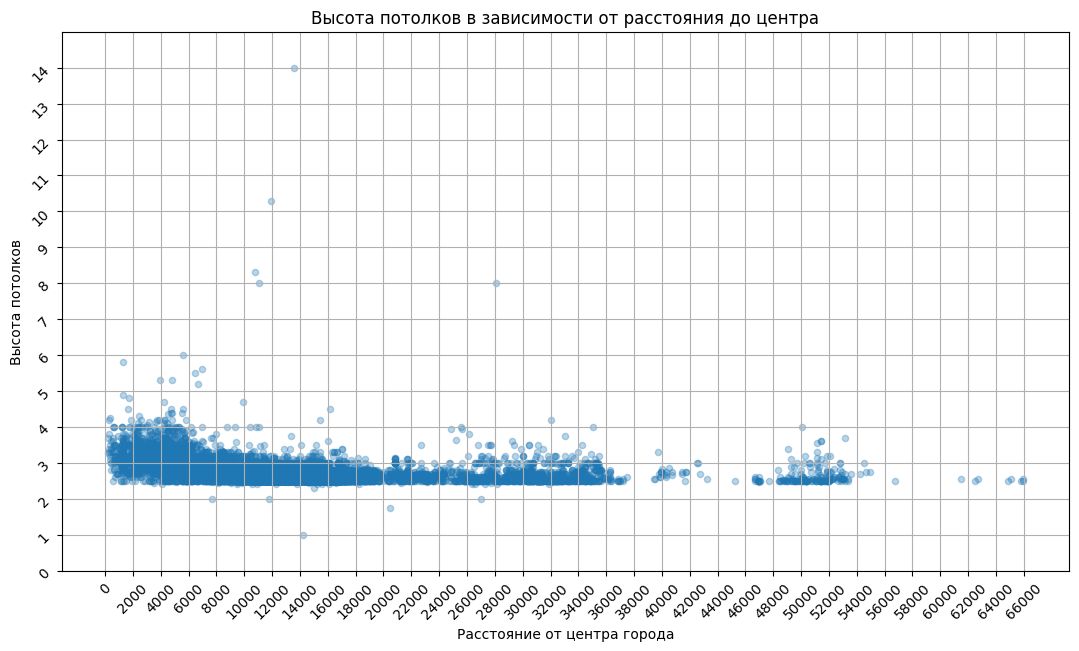

In [130]:
(
    df_c_chec.sort_values(by='city_center_distance')
    .plot(x='city_center_distance', y='ceiling_height',
          kind='scatter',
          alpha=0.31,
          ylim = (0,15), 
          xticks=range(0, 67000, 2000), 
          yticks=range(0, 15, 1),
          grid=True,
          figsize=(13, 7),
          title='Высота потолков в зависимости от расстояния до центра', 
          ylabel='Высота потолков', 
          xlabel='Расстояние от центра города')
)
plt.tick_params(labelrotation = 45)
plt.show()

Уберем выбросы.

In [131]:
df = df[(df['ceiling_height'] >= 2.5) 
        & (df['ceiling_height'] <= 6) 
        | df['ceiling_height'].isna()].reset_index(drop=True)

Посчитаем долю значений, которые были отсеяны.

In [132]:
1-df.shape[0]/rows_count

0.01974766867800326

Около 2% данных было отсеяно, чтобы убрать выбросы по высоте потолка.

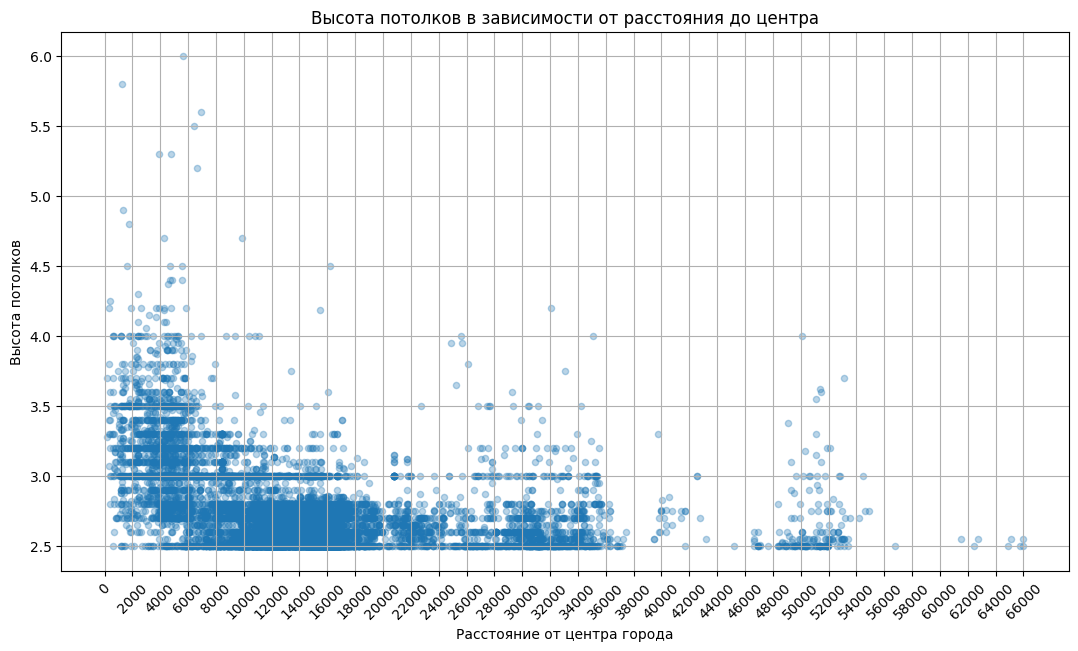

In [133]:
df_c_chec = df.dropna(subset=['city_center_distance']).reset_index(drop=True)
(
    df_c_chec.sort_values(by='city_center_distance')
    .plot(x='city_center_distance', y='ceiling_height',
          kind='scatter',
          alpha=0.31, 
          xticks=range(0, 67000, 2000),
          grid=True,
          figsize=(13, 7),
          title='Высота потолков в зависимости от расстояния до центра', 
          ylabel='Высота потолков', 
          xlabel='Расстояние от центра города')
)

plt.xticks(rotation = 45)
plt.show()

По получившемуся графику выберем интервалы, по медианным значениям из которых будем заполнять пропуски в высоте потолка.

Интервалы:
- 0-6 км
- 6-12 км
- 12-18 км
- 18-36 км
- 36-48 км
- 49-55 км
- 55-67 км

Заполним пропуски по выделенным интервалам.

In [134]:
df['distance_int'] = pd.cut(df['city_center_distance'], [0, 3000, 7000, 12000, 36000, 48000, 55000, 67000])

In [135]:
df.groupby('distance_int')['ceiling_height'].median()

distance_int
(0, 3000]         3.200
(3000, 7000]      3.000
(7000, 12000]     2.650
(12000, 36000]    2.600
(36000, 48000]    2.575
(48000, 55000]    2.550
(55000, 67000]    2.500
Name: ceiling_height, dtype: float64

In [136]:
distance_list = list(df['distance_int'].unique())

for category in distance_list:
    ceiling_median = df[df['distance_int'] == category]['ceiling_height'].median()
    df.loc[(df['distance_int'] == category) & (df['ceiling_height'].isna()), 'ceiling_height'] = ceiling_median

In [137]:
print('Доля пропусков в информации о высоте потолков:', (1 - df['ceiling_height'].count()/df.shape[0]).round(3))

Доля пропусков в информации о высоте потолков: 0.108


Таким образом процент пропусков в столбце `ceiling_height` снизился с 38.8% до 11%. Учитывая, что данные о расстоянии заполнены для Санкт-Петербурга, пропуски в высоте потолка тоже должны быть заполнены для Северной столицы. Проверим, каким значениям в столбце `is_spb` соответствуют оставшиеся пропуски.

In [138]:
df[df['ceiling_height'].isna()]['is_spb'].value_counts()

False    2506
Name: is_spb, dtype: int64

Все пропуски находятся за пределами Санкт-Петербурга. Заполним оставшиеся пропуски медианным значением высоты потолков в области.

In [139]:
oblast_ceiling_median = df[df['is_spb'] == False]['ceiling_height'].median()
df.loc[df['ceiling_height'].isna(), 'ceiling_height'] = oblast_ceiling_median

In [140]:
print('Медианное значение высоты потолков в области:', oblast_ceiling_median, 'м')

Медианное значение высоты потолков в области: 2.6 м


In [141]:
print('Доля пропусков в информации о высоте потолков:', (1 - df['ceiling_height'].count()/df.shape[0]).round(3))

Доля пропусков в информации о высоте потолков: 0.0


Удалим вспомогательный столбец `distance_int`.

In [142]:
df.drop('distance_int', axis=1, inplace=True)

#### Балконы

In [143]:
df['balcony_count'].describe()

count    11928.000000
mean         1.150989
std          1.069289
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony_count, dtype: float64

Примерно в 50% случаев информация о количестве балконов в квартире оказалась незаполненной.
Посмотрим, сколько строк соответствует указанным значениям.

In [144]:
df['balcony_count'].value_counts()

1.0    4120
0.0    3665
2.0    3591
5.0     295
4.0     181
3.0      76
Name: balcony_count, dtype: int64

Заполним пропуски в информации о балконах значением 0 и посмотрим, как изменилось соотношение квартир с разным количеством балконов.

In [145]:
df['balcony_count'] = df['balcony_count'].fillna(0)
display(df['balcony_count'].value_counts())
print("Количество пропусков:", df[['balcony_count']]['balcony_count'].isna().sum())

0.0    14968
1.0     4120
2.0     3591
5.0      295
4.0      181
3.0       76
Name: balcony_count, dtype: int64

Количество пропусков: 0


Получилось, что более половины квартир не имеют балконов. Это выглядит не очень правдоподобно. Но поскольку попросить перепроверить предоставленную информацию невозможно, оставим всё как есть.

__Типы данных__

Заменим тип данных в столбце с количеством балконов на целочисленный.

In [146]:
df['balcony_count'] = df['balcony_count'].astype('int64')

#### Итоги по информации о параметрах квартиры4

1. Заполнены пропуски в данных.
2. Устраныены ошибки в данных о количестве этажей в здании, о площадях, о высоте потолков.
3. Созданы рассчетные столбцы с долей жилой площади от общей  площади квартиры и площади кухни от общей площади квартиры.

### Информация о публикации

Изменим тип данных с object на datetime в колонке `first_day_exposition` и посмотрим, публикации за какой период предоставлены для анализа.

In [147]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y%m%dT%H:%M:%S')

In [148]:
first_publication = df['first_day_exposition'].min()
print('Первая публикация:   ', first_publication)
last_publication = df['first_day_exposition'].max()
print('Последняя публикация:', last_publication)

Первая публикация:    2014-11-27 00:00:00
Последняя публикация: 2019-05-03 00:00:00


Оценим количественные характеристики в информации о публикации.

In [149]:
df[public_data].describe()

,total_images_count,last_price,expo_days_count
count,23231.000000,2.323100e+04,20140.000000
mean,9.881452,6.490984e+06,181.140765
std,5.675648,1.081699e+07,220.061887
min,0.000000,1.219000e+04,1.000000
25%,6.000000,3.429000e+06,45.000000
50%,9.000000,4.636000e+06,95.000000
75%,14.000000,6.750000e+06,232.000000
max,50.000000,7.630000e+08,1580.000000


Явных аномалий не наблюдается.

__Тип данных__

Предположим, что незаполненные значения в столбце `expo_days_count` связанны с тем, что объявление не успело продержаться на сайте даже одного дня, квартира была куплена сразу. Посмотрим, каково минимальное значение в данном столбце. Если оно равно 1, а не 0, заполним пропуски значением 0.

In [150]:
df['expo_days_count'].min()

1.0

Заполним пропуски значением 0 дней и изменим тип данных на целочисленный:

In [151]:
df['expo_days_count'] = df['expo_days_count'].fillna(0)
df['expo_days_count'] = df['expo_days_count'].astype('int64')
print('Минимальное количество дней на сайте:', df['expo_days_count'].min())
print('Тип данных столбца \'expo_days_count\':', df['expo_days_count'].dtype)

Минимальное количество дней на сайте: 0
Тип данных столбца 'expo_days_count': int64


#### День недели, месяц и год публикации объявления

Создадим столбцы для информации о том в каком году, в каком месяце и в какой день недели было размещено объявление о продаже квартиры. Заполним их по данным из столбца `first_day_exposition`.

In [152]:
df['expo_weekday'] = pd.DatetimeIndex(df['first_day_exposition']).day_name()
df['expo_weekday_num'] = pd.DatetimeIndex(df['first_day_exposition']).weekday
df['expo_month'] = pd.DatetimeIndex(df['first_day_exposition']).month
df['expo_year'] = pd.DatetimeIndex(df['first_day_exposition']).year
df[['expo_year', 'expo_month', 'expo_weekday']].head()

,expo_year,expo_month,expo_weekday
0,2019,3,Thursday
1,2018,12,Tuesday
2,2015,8,Thursday
3,2015,7,Friday
4,2018,6,Tuesday


#### Итоги по информации об апартаментах

1. В наборе данных собрана информация за 4.5 года с 2014 по 2019. 
2. Устранены пропуски в информации об количестве дней размещения объявления.
3. Типы данных столбцов приведены в соответствие с содержанием.
4. Для дальнейшего анализа созданы отдельные столбцы с информацией о месяце и дне недели публикации объявления о продаже.

### Итоги предобработки

#### Набор данных для анализа

__Тематические блоки__

На этапе обработки данных было создано несколько новых столбцов. Посмотрим их список.

In [153]:
list(set(df.columns) - set(geo_data) - set(flat_data) - set(public_data))

['part_kitchen_area',
 'expo_month',
 'is_spb',
 'locality_type',
 'part_living_area',
 'center_distance_km',
 'locality_name',
 'expo_weekday_num',
 'expo_year',
 'flatfloor_category',
 'expo_weekday',
 'sqm_price']

Распределим эти столбцы по тематическим блокам. В итоге блоки будут выглядеть следующим образом.

Географическая информация:

  - `airport_distance` — расстояние до ближайшего аэропорта в метрах (м) 
  - `city_center_distance` — расстояние до центра города (м)
  - `parks_count` — число парков в радиусе 3 км
  - `park_distance` — расстояние до ближайшего парка (м)
  - `ponds_count` — число водоёмов в радиусе 3 км
  - `pond_distance` — расстояние до ближайшего водоёма (м)
  - `center_distance_km` — расстояние до центра города (км)
  - `locality` — тип и название населённого пункта
  - `locality_type` — тип населённого пункта
  - `locality_name` — название населённого пункта
  - `is_spb` — находится ли объект недвижимости в административно-территориальных границах Санкт-Петербурга
     
Информация об основных характеристиках квартиры:
  
  - `total_area` — площадь квартиры в квадратных метрах (м²)
  - `living_area` — жилая площадь в квадратных метрах (м²)
  - `kitchen_area` — площадь кухни в квадратных метрах (м²)
  - `ceiling_height` — высота потолков (м)
  - `rooms_count` — число комнат
  - `balcony_count` — число балконов  
  - `floor` — этаж
  - `total_floors` — всего этажей в доме
  - `part_living_area` — соотношение жилой и общей площади квартиры
  - `part_kitchen_area` — соотношение площади кухни и общей площади квартиры 
  - `is_apartment` — апартаменты (булев тип)  
  - `is_open_plan` — свободная планировка (булев тип)
  - `is_studio` — квартира-студия (булев тип) 
  - `floors_category` — категории зданий по этажности
  - `flatfloor_category` — категория этажа квартиры (первый, последний, другой)
  
Информация о цене квартиры и публикации о продаже: 
  
  - `last_price` — цена на момент снятия с публикации    
  - `sqm_price` — цена квадратного метра на момент снятия с публикации 
  - `total_images_count` — число фотографий квартиры в объявлении
  - `expo_days_count` — сколько дней было размещено объявление (от публикации до снятия)  
  - `first_day_exposition` — дата публикации
  - `expo_year` — год публикации объявления о продаже
  - `expo_month` — месяц публикации объявления о продаже
  - `expo_weekday` — день недели публикации объявления о продаже.  
  
Добавим новые столбцы в ранее созданные тематические списки.

In [154]:
# Географическая информация
geo_data = geo_data + ['locality_type', 'locality_name', 'center_distance_km', 'is_spb']

# Информация об основных характеристиках квартиры
flat_data = flat_data + ['flatfloor_category', 'part_living_area', 'part_kitchen_area']

# Информация о цене квартиры и публикации о продаже
public_data = public_data + ['expo_year', 'expo_month', 'expo_weekday', 'sqm_price']

__Типы данных__

Просмотрим еще раз типы данных для каждого столбца.

In [155]:
df_dtypes_geo = df[geo_data].dtypes.reset_index()
df_dtypes_geo.columns = ['column_name', 'type']
df_dtypes_flat = df[flat_data].dtypes.reset_index()
df_dtypes_flat.columns = ['column_name', 'type']
df_dtypes_public = df[public_data].dtypes.reset_index()
df_dtypes_public.columns = ['column_name', 'type']

display_side_by_side(df_dtypes_geo, df_dtypes_flat, df_dtypes_public)

,column_name,type
0,locality,object
1,airport_distance,float64
2,city_center_distance,float64
3,parks_count,float64
4,park_distance,float64
5,ponds_count,float64
6,pond_distance,float64
7,locality_type,object
8,locality_name,object
9,center_distance_km,float64


В большинстве случаев типы данных соответствуют ожидаемым за исключением колонок `parks_count` и `ponds_count`. Изменить тип с дробного на целочисленный в этих столбцах не получилось. Это связано с наличием в них пропусков. 

На возможностях анализа это не скажется, поэтому оставим такой результат без изменений.

__Пропуски__

Посмотрим количество пропусков в итоговом наборе данных.

In [156]:
print('Количество пропусков по столбцам:')
(df.isna().sum())[(df.isna().sum()) != 0].sort_values(ascending=False)

Количество пропусков по столбцам:


airport_distance        5351
city_center_distance    5351
parks_count             5351
park_distance           5351
ponds_count             5351
pond_distance           5351
center_distance_km      5351
dtype: int64

Как было установлено ранее, пропуски присутствуют в столбцах с географической информацией в одних и тех же строках. 

Поскольку информация о расстояниях заполнена только для Санкт-Петербурга, проведем анализ этих показателей только для Северной столицы.

__Набор данных для анализа__

Итоговый набор данных выглядит следующим образом.

In [157]:
pd.set_option('display.max_columns', None)
df.head()

,total_images_count,last_price,total_area,first_day_exposition,rooms_count,ceiling_height,total_floors,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony_count,locality,airport_distance,city_center_distance,parks_count,park_distance,ponds_count,pond_distance,expo_days_count,locality_name,locality_type,is_spb,center_distance_km,flatfloor_category,sqm_price,part_living_area,part_kitchen_area,expo_weekday,expo_weekday_num,expo_month,expo_year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,False,False,False,25.000,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0,Санкт-Петербург,город,True,16.028,Другой этаж,120370.370370,0.472222,0.231481,Thursday,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.60,11,18.600000,1,False,False,False,11.000,2,поселок Шушары,12817.0,18603.0,0.0,-1.0,0.0,-1.0,81,Шушары,поселок,True,18.603,Первый этаж,82920.792079,0.460396,0.272277,Tuesday,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.60,5,34.300000,4,False,False,False,8.300,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,Санкт-Петербург,город,True,13.933,Другой этаж,92785.714286,0.612500,0.148214,Thursday,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,3.00,14,98.933333,9,False,False,False,19.875,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424,Санкт-Петербург,город,True,6.800,Другой этаж,408176.100629,0.622222,0.125000,Friday,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,False,False,False,41.000,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,Санкт-Петербург,город,True,8.098,Другой этаж,100000.000000,0.320000,0.410000,Tuesday,1,6,2018


Создадим также отдельно набор данных __df_geo__ для географичческих характеристик, очищенный от пустых значений.

In [158]:
df_geo = df.dropna(subset='city_center_distance')

#### Выводы о качестве предоставленных данных

На этапе предобработки данные были приведены в формат, подходящий для дальнейшего анализа. Было получено представление о том, в каких колонках информацию можно использовать в полном объеме, а в каких только с учетом определенных особенностей (данные с пропусками). 

Выделим __факторы, способствующие тому, что данные изначально оказываются не готовы к анализу__.

__Пропуски__ в столбцах могут быть вызваны следующими причинами:
1. Пропуски в колонках с информацией, которая не предполагает обязательного заполнения.
2. Технические сбои.
3. Столбцы, где отсутствие информации говорит, что искомый признак отсутствует.

__Неправильные типы данных__ появляются по следующим причинам:
1. Из-за пропусков в данных. В столбцах с пропусками не поддерживается целочисленный тип данных, вместо него появляется тип float. В столбцах, где должен быть булевый тип данных, появляется тип object. 
2. В столбце с информацией о дате и времени данные также хранятся в типе object. Это может быть связано с особенностями хранения данных на сайте, откуда производилась выгрузка, например, из-за необходимости хранить данные в более сжатом виде.

__Аномалии и неявные дубликаты__ возникают в основном по причине того, что в системе ввода данных есть возможности для вариаций обозначения одной и той же информации разными способами. Например, использование буквы "е" или "ё" в одних и тех же словах. Или использования разных единиц измерения для обозначения одного и того же параметра.

Чтобы в дальнейшем избежать таких сложностей при обработке данных следует лучше продумать механизм сбора информации.

## Исследовательский анализ данных

### План анализа

Разобьем анализ рынка недвижимости на следующие этапы:

1. Проанализируем информацию по тематическим блокам. Сначала исследуем количественные характеристики. Построим гистограммы и определим какой диапазон значений наиболее характерен для рассматриваемых параметров. Затем проанализируем качественные признаки представленного жилья. Опишем получившиеся результаты.

2. Чтобы определить, от каких параметров зависит стоимость объектов недвижимости, необходимо очистить набор данных от экстремальных значений, искажающих общую картину, и оставить только данные, отражающие типичную для рынка недвижимости картину. Поэтому после рассмотрения всех характеристик, очистим набор данных от выбросов, чтобы получить выборку с наиболее характерными значениями.

3. Используем получившуюся выборку для установления закономерностей ценообразования на рынке недвижимости в Санкт-Петербурге и Ленинградской области.

4. Посмотрим, как продаются квартиры в разных городах. Где больше всего предложений, и где самые высокие цены.

5. Проанализируем отдельно рынок в Санкт-Петербурге. Поскольку город занимает большую территорию и неоднороден по жилищным условиям, на стоимость жилья большое значение могут оказывать географические факторы. Посмотрим, как изменяются цены на квартиры в зависимости от расстояния до центра, аэропорта, от наличия вблизи парков и прудов. 

6. Подведем итоги проделанной работы.

### Функция построения гистограммы

Для построения гистограммы и диаграммы размаха будем использовать следующую функцию.

In [159]:
def hist_box(data, title, xticks, xticks1, xlabel, yticks=[], bins=1000):
    fig, axes = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.85, .15)})
    plt.subplots_adjust(wspace=0, hspace=0)

    axes[0].hist(data, bins=bins)
    axes[1].boxplot(data, vert=False)

    axes[0].set(title=title, xticks=xticks)
    axes[1].set(xticks=xticks1)
    axes[1].set(yticks=yticks)
    axes[1].tick_params(labelrotation = 45)

    axes[0].grid()
    axes[1].grid()

    axes[1].set_xlabel(xlabel)

    fig.set_figwidth(14)
    fig.set_figheight(7)

### Изучение качественных и количественных характеристик объектов недвижимости

#### Изучение параметров квартиры

Количественные характеристики:
  
  - `total_area` — площадь квартиры в квадратных метрах (м²)
  - `living_area` — жилая площадь в квадратных метрах (м²)
  - `kitchen_area` — площадь кухни в квадратных метрах (м²)
  - `part_living_area` — соотношение жилой и общей площади квартиры
  - `part_kitchen_area` — соотношение площади кухни и общей площади квартиры  
  - `ceiling_height` — высота потолков (м)
  - `rooms_count` — число комнат
  - `balcony_count` — число балконов  
  - `floor` — этаж
  - `total_floors` — всего этажей в доме

Категориальные характеристики:

  - `is_apartment` — апартаменты (булев тип)  
  - `is_open_plan` — свободная планировка (булев тип)
  - `is_studio` — квартира-студия (булев тип) 
  - `floors_category` — категории зданий по этажности
  - `flatfloor_category` — категория этажа квартиры (первый, последний, другой)


Не все параметры содержат выбросы. В информации о высоте потолка аномалии были устранены на этапе предобработки. Однако, чтобы представить общую картину, построим гистограммы для всех показателей.

##### Общая площадь

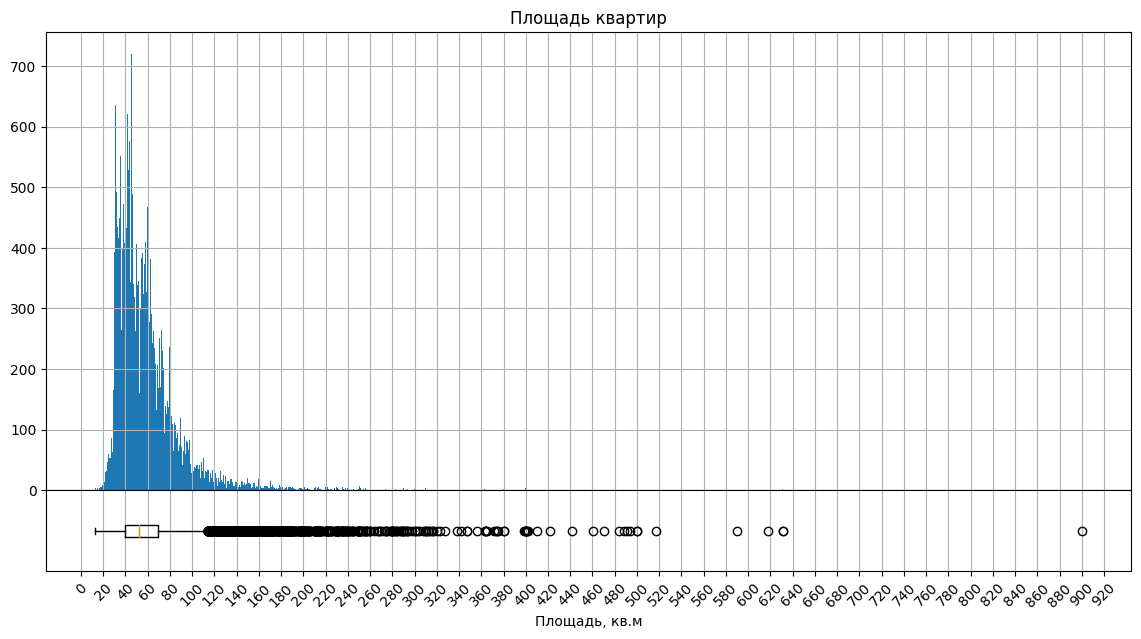

In [160]:
hist_box(df['total_area'], 
         'Площадь квартир', 
         range(0, 930, 20), 
         range(0, 930, 20),
         'Площадь, кв.м')

In [161]:
df['total_area'].describe()

count    23231.000000
mean        60.109618
std         34.901862
min         13.000000
25%         40.000000
50%         52.000000
75%         69.500000
max        900.000000
Name: total_area, dtype: float64

Диапазон площадей квартир получился очень большим: минимальное значение площади 12 кв.м, максимальное - 900 кв.м. 
Как уже было установлено, жилье с подобными экстремальными значениями действительно есть в Ленинградской области.

Установим, однако, границы наиболее характерных значений. Хвост минимальных значений небольшой, большие значения, напротив имеют широкий диапазон. Поэтому определим нижную границу как 1%, а верхнюю как 97%.

In [162]:
print()
print('Верхняя и нижняя граница наиболее характерных значений общей площади квартиры:')
(
    df['total_area'].quantile([0.01, 0.97])
    .reset_index().rename(columns = {'index':'part_%'})
    .style.format({'part_%':('{:.2%}')})
)


Верхняя и нижняя граница наиболее характерных значений общей площади квартиры:


,part_%,total_area
0,1.00%,26.000000
1,97.00%,136.020000


Наиболее характерные значения площадей жилья лежат в пределах от 25 до 136 кв.м.

##### Жилая площадь

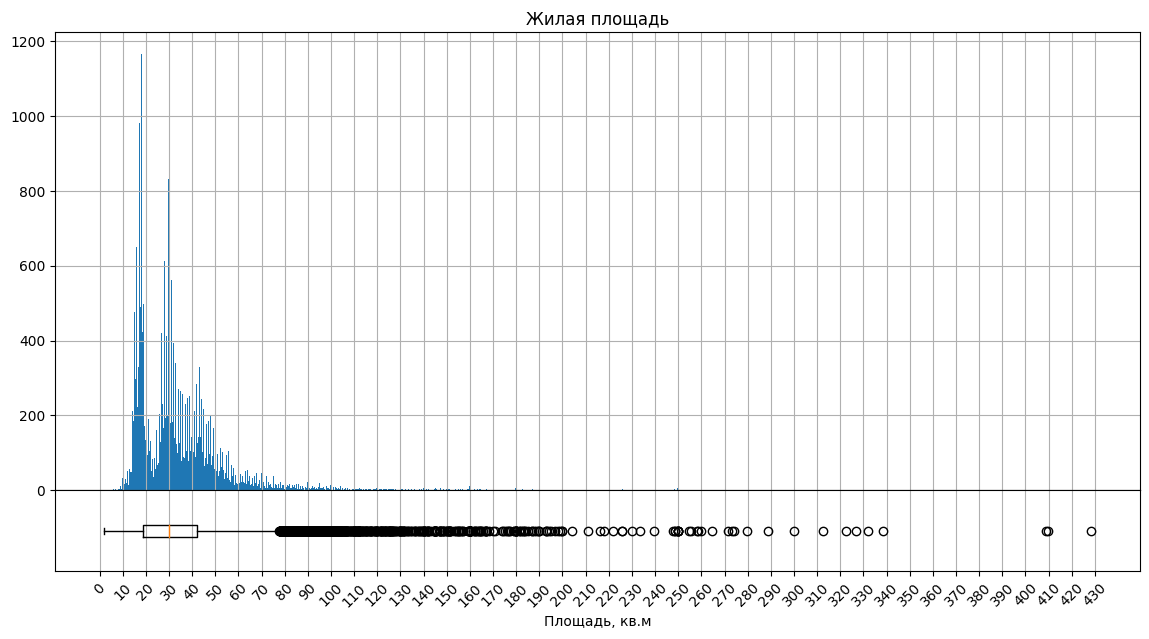

In [163]:
hist_box(df['living_area'], 
         'Жилая площадь', 
         range(0, 440, 10), 
         range(0, 440, 10),
         'Площадь, кв.м')

In [164]:
df['living_area'].describe()

count    23231.000000
mean        34.571745
std         22.561239
min          2.000000
25%         18.700000
50%         30.000000
75%         42.300000
max        428.131194
Name: living_area, dtype: float64

Распределение показателей площади имеет два пика - в районе 18 и 30 кв.м. Возможно это связано со стандартными планировками квартир. 
Минимальное значение жилой площади составляет 2 кв.м. 

Определим границы наиболее характерных значений.

In [165]:
print()
print('Верхняя и нижняя граница наиболее характерных значений жилой площади квартиры:')
(
    df['living_area'].quantile([0.01, 0.97])
    .reset_index().rename(columns = {'index':'part_%'})
    .style.format({'part_%':('{:.2%}')})
)


Верхняя и нижняя граница наиболее характерных значений жилой площади квартиры:


,part_%,living_area
0,1.00%,13.000000
1,97.00%,82.910000


##### Площадь кухни

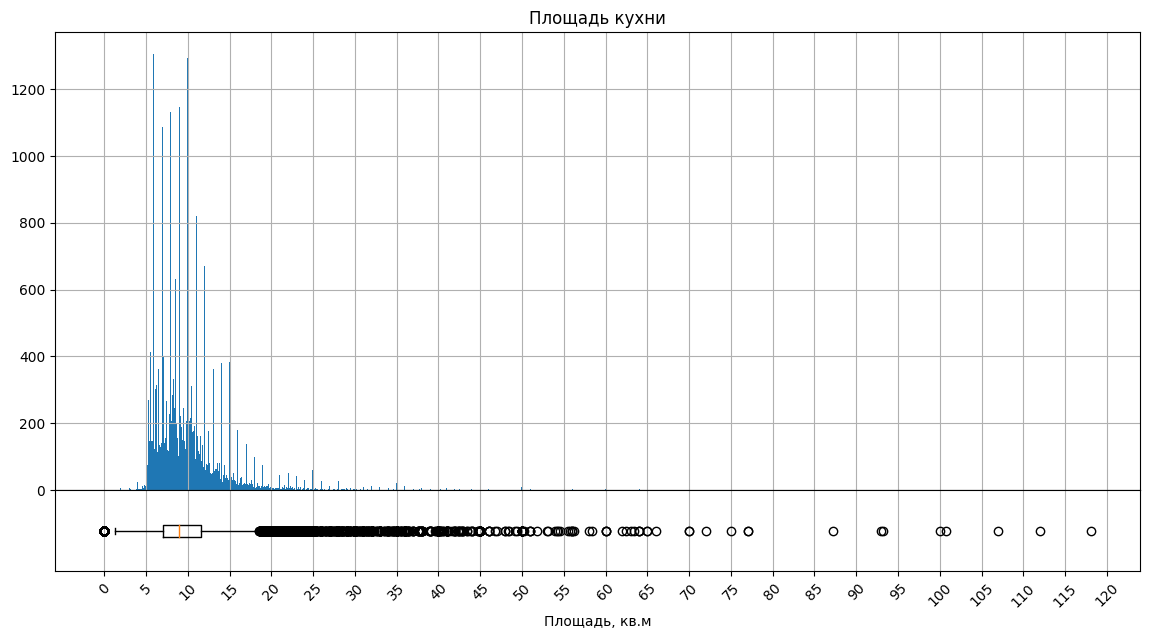

In [166]:
hist_box(df['kitchen_area'], 
         'Площадь кухни', 
         range(0, 125, 5), 
         range(0, 125, 5),
         'Площадь, кв.м')

In [167]:
df['kitchen_area'].describe()

count    23231.000000
mean        10.331447
std          5.795337
min          0.000000
25%          7.000000
50%          9.000000
75%         11.600000
max        118.035000
Name: kitchen_area, dtype: float64

Также как для жилой площади, пиковые значения в площадях кухни указывают на стандартные планировки квартир. Значения равные 0 соответствуют студиям и квартирам с открытым планом. Небольшой процент квартир имеют совсем маленькие кухни площадью до 5 м. Максимальная площадь - 118 кв. м. это расчетное на основе количества комнат и общей площади квартиры значение. 

Рассчитаем наиболее характерные значения площади кухни.

In [168]:
print()
print('Верхняя и нижняя граница наиболее характерных значений площади кухни:')
(
    df['kitchen_area'].quantile([0.02, 0.98])
    .reset_index().rename(columns = {'index':'part_%'})
    .style.format({'part_%':('{:.2%}')})
)


Верхняя и нижняя граница наиболее характерных значений площади кухни:


,part_%,kitchen_area
0,2.00%,5.000000
1,98.00%,27.000000


##### Соотношение жилой и общей площади

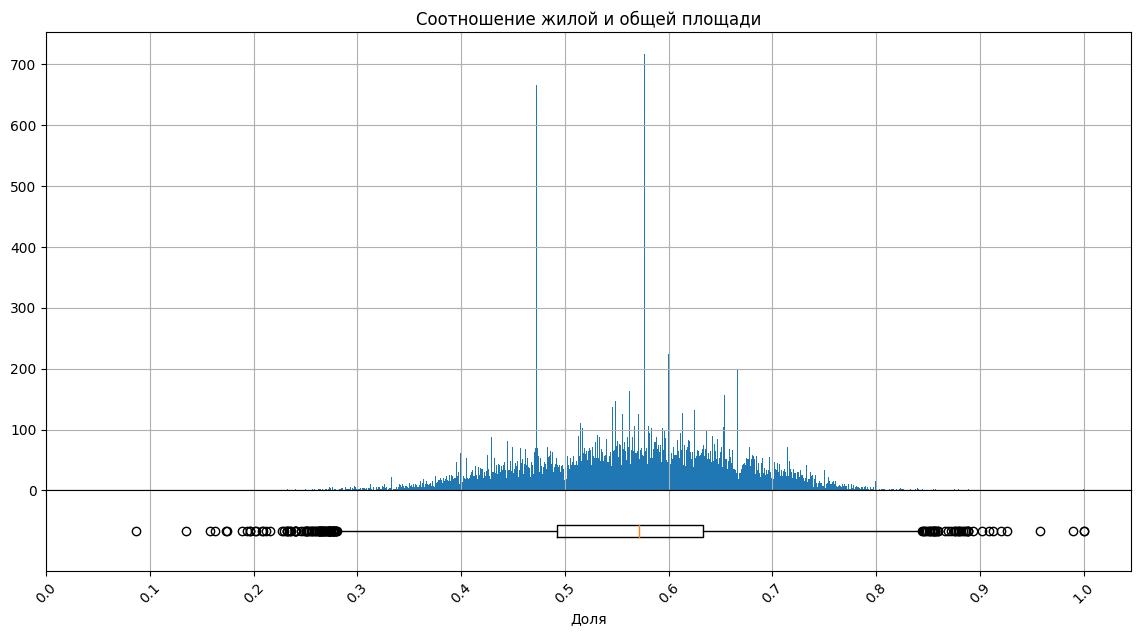

In [169]:
hist_box(df['part_living_area'], 
         'Соотношение жилой и общей площади', 
         np.linspace(0, 1, 11), 
         np.linspace(0, 1, 11), 
         'Доля')

In [170]:
df['part_living_area'].describe()

count    23231.000000
mean         0.563954
std          0.100084
min          0.086957
25%          0.492018
50%          0.571429
75%          0.632945
max          1.000000
Name: part_living_area, dtype: float64

Соотношение общей и жилой площадей в целом имеет нормальное распределение со сдвигом медианы в сторону более высоких значений. То есть чаще жилая площадь занимает более половины площади квартиры. Выделяющиеся на графике пики - результат заполнения пропусков.

##### Соотношение площади кухни и общей площади

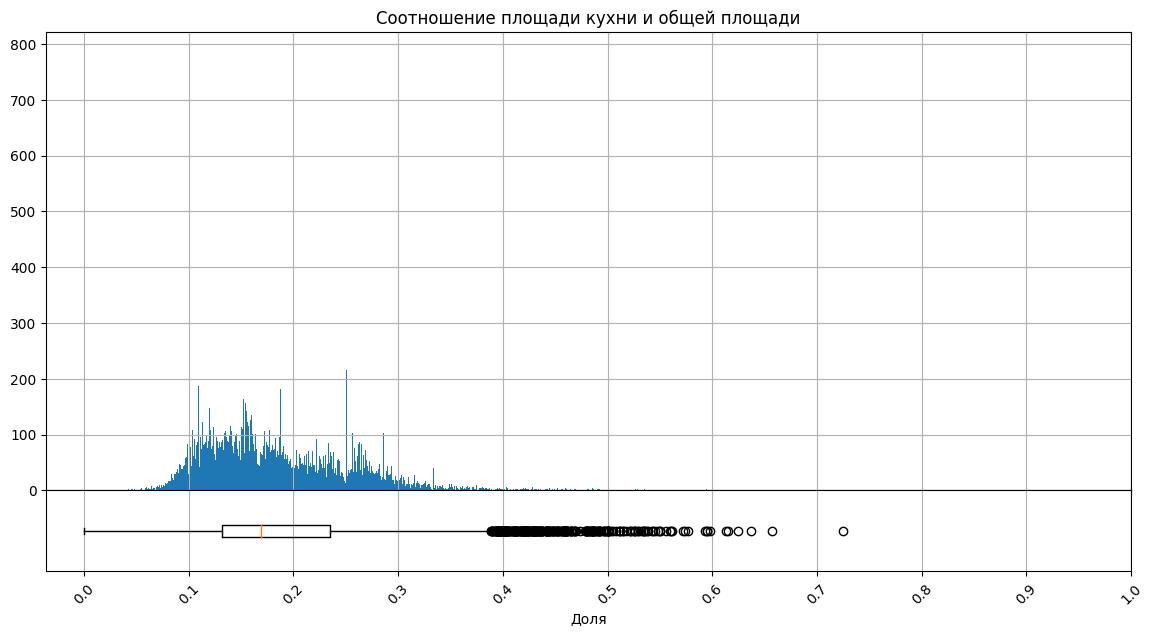

In [171]:
hist_box(df['part_kitchen_area'], 
         'Соотношение площади кухни и общей площади', 
         np.linspace(0, 1, 11), 
         np.linspace(0, 1, 11), 
         'Доля')

In [172]:
df['part_kitchen_area'].describe()

count    23231.000000
mean         0.184583
std          0.072261
min          0.000000
25%          0.132075
50%          0.169355
75%          0.234828
max          0.724638
Name: part_kitchen_area, dtype: float64

Кухни в большинстве случает занимают 5-30% площади квартиры.

##### Высота потолков

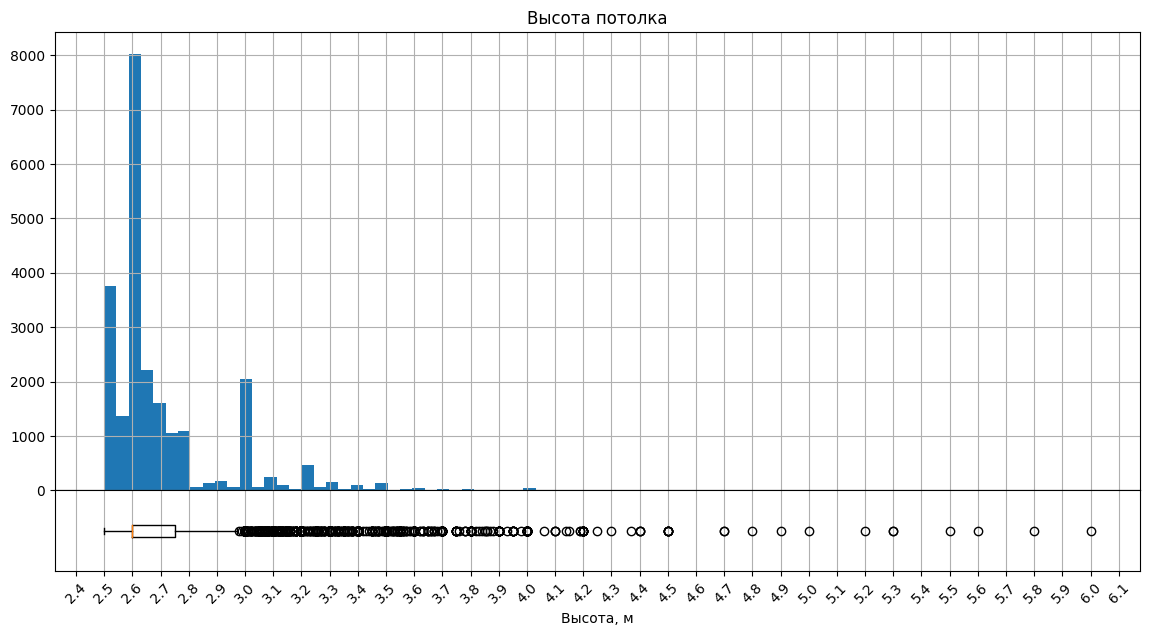

In [173]:
hist_box(df['ceiling_height'], 
         'Высота потолка', 
         np.linspace(2.4, 6.1, 38), 
         np.linspace(2.4, 6.1, 38), 
         'Высота, м', 
         bins=80)

Аномалии в информации о высоте потолков были отсеяны на этапе предобработки. 
Согласно гистограмме и диаграмме размаха, большая часть значений входит в диапазон 2,5-6 м. Если выделять еще более характерный диапазон, он составит 2.5-3.6 м.

##### Число комнат

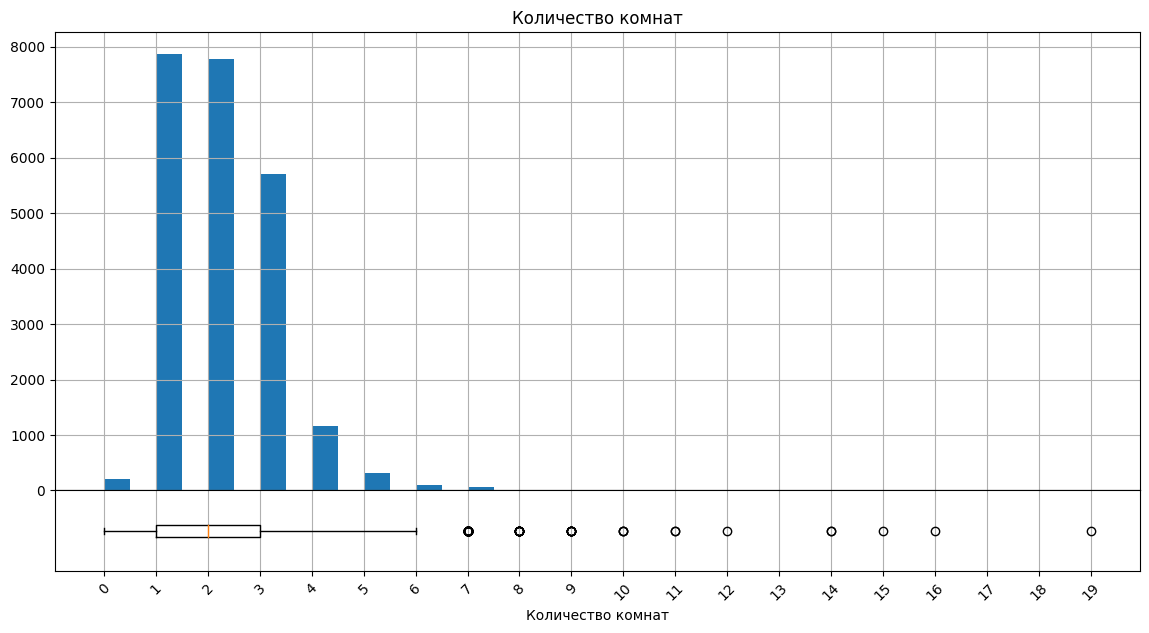

In [174]:
hist_box(df['rooms_count'], 
         'Количество комнат', 
         range(0, 20), 
         range(0, 20), 
         'Количество комнат', 
         bins=38)

In [175]:
df['rooms_count'].describe()

count    23231.000000
mean         2.068917
std          1.077150
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms_count, dtype: float64

Для студий и квартир с открытым планом значение числа комнат указано равным 0. Больше всего однокомнатных и двухкомнатных квартир. Несколько меньше трехкомнатных. Квартиры с большим количеством комнат сильно отстают по численности. Максимальное значение - 19 комнат.

In [176]:
print()
print('Верхняя и нижняя граница наиболее характерных значений количество комнат:')
(
    df['rooms_count'].quantile([0.00, 0.995])
    .reset_index().rename(columns = {'index':'part_%'})
    .style.format({'part_%':('{:.2%}')})
)


Верхняя и нижняя граница наиболее характерных значений количество комнат:


,part_%,rooms_count
0,0.00%,0.000000
1,99.50%,6.000000


Наиболее характерным является наличие от 1 до 6-ми комнат, а также студии и квартиры с открытым планом.

##### Число балконов

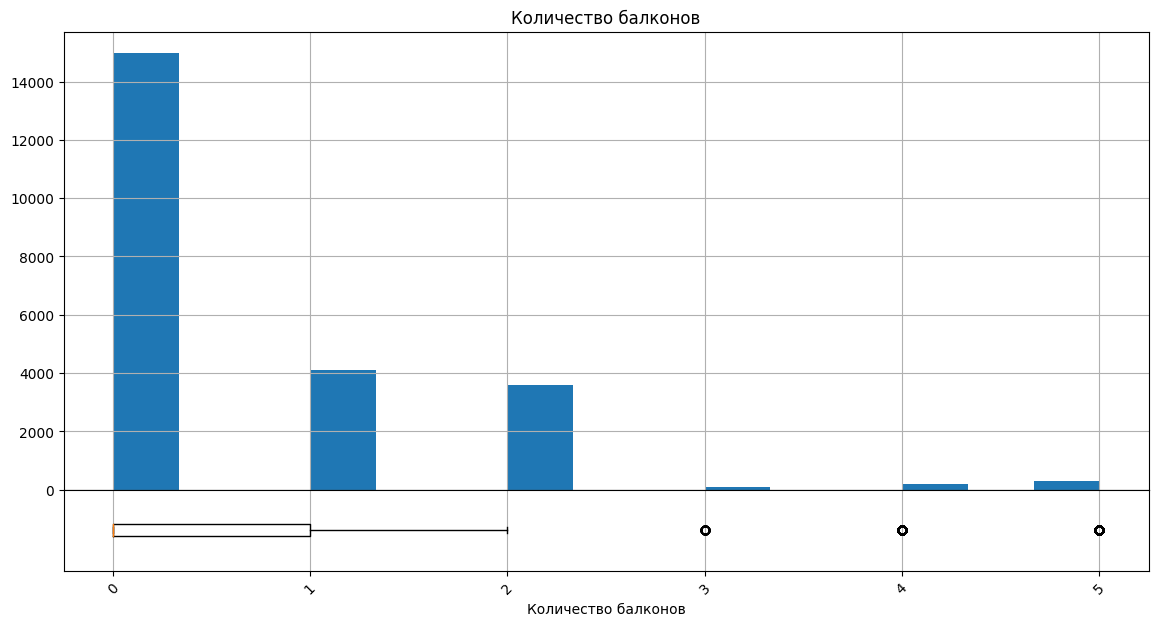

In [177]:
hist_box(df['balcony_count'], 
         'Количество балконов', 
         range(0, 6), 
         range(0, 6), 
         'Количество балконов', 
         bins=15)

Большинство квартир не имеют балконов. Что интересно, квартир с 3-мя балконами несколько меньше, чем с 4-мя и 5-ю. Не будем фильтровать набор данных по этой характеристике.

##### Этаж квартиры

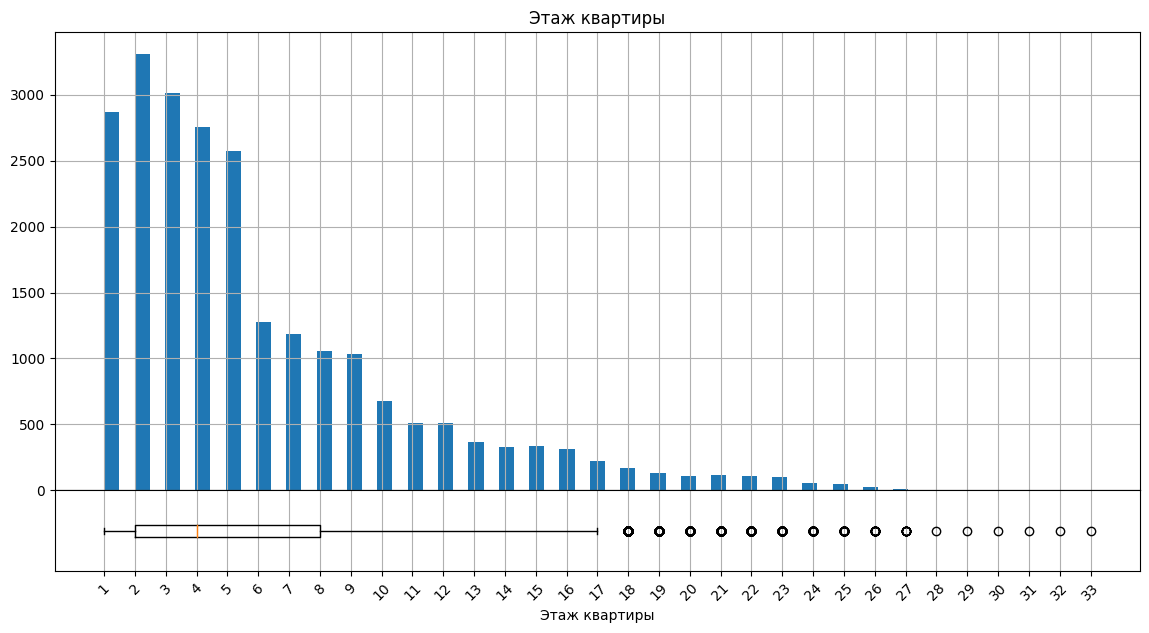

In [178]:
hist_box(df['floor'], 
         'Этаж квартиры', 
         range(1, 34), 
         range(1, 34), 
         'Этаж квартиры', 
         bins=65)

Гистограмма распределения этажей квартиры имеет ступенчатый вид. Это связанно с типичными видами домов: пятиэтажки, девятиэтажки и так далее. Больше всего квартир на втором этаже. Это не удивительно, ведь первые этажи жилых зданий иногда занимают магазины, офисные и административные помещения. 

Самый высокий из представленных этажей - 33-й.

##### Общее количество этажей в доме

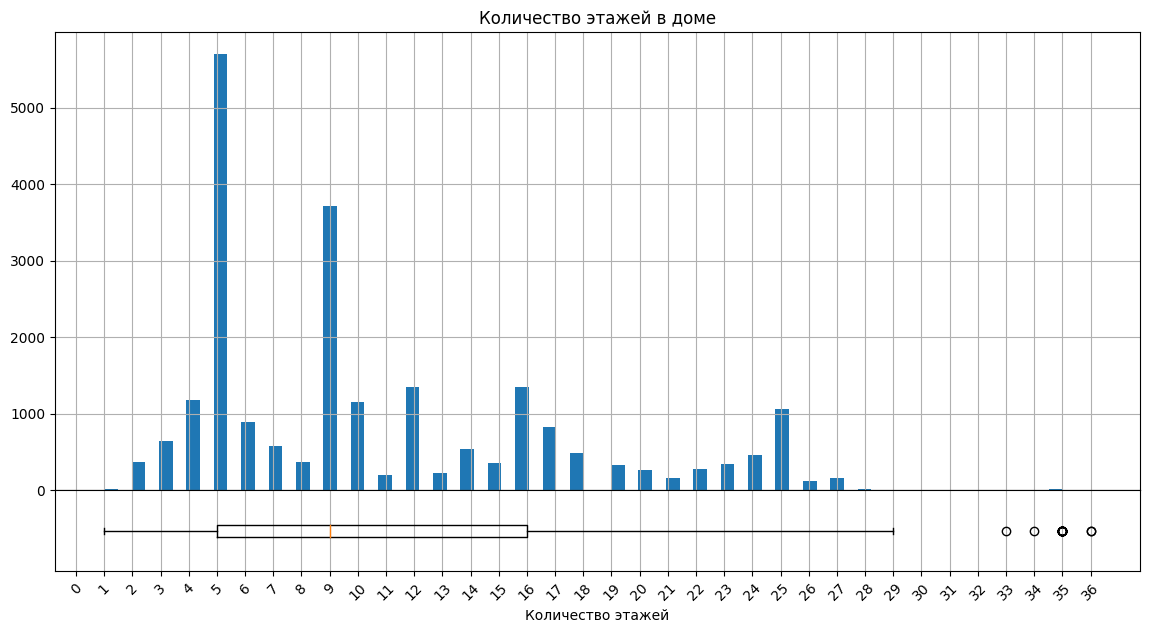

In [179]:
hist_box(df['total_floors'], 
         'Количество этажей в доме', 
         range(0, 37), 
         range(0, 37), 
         'Количество этажей', 
         bins=72)

Явно выделяются типичные по этажности виды жилых домов - пятиэтажки, девятиэтажки. Широко распространены также дома с 4-мя, 10-ю, 12-ю, 16-ю и 25-ю этажами. В самом высоком доме - 36 этажей.

##### Типы этажа квартиры

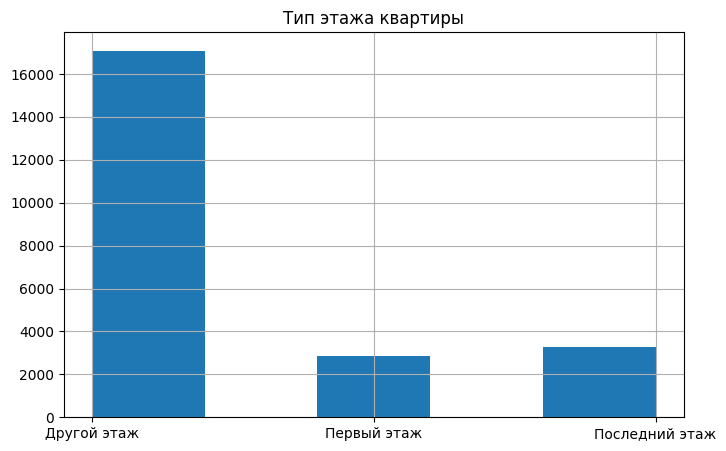

In [180]:
fig, ax = plt.subplots()
ax.hist(df['flatfloor_category'], bins=5)
ax.set(title='Тип этажа квартиры')
ax.grid(True)
fig.set_figwidth(8)
fig.set_figheight(5)
plt.show()

В категорию "другой этаж" входят все этажи кроме первого и последнего, поэтому не удивительно, что в нее попадают наибольшее количество объектов. Первые этажи жилых домов иногда занимают административные организации или представители бизнеса, из-за чего квартир в этой группе несколько меньше, чем в группе "последний этаж".

#### Изучение географической информации

##### Расстояние до центра города (м)

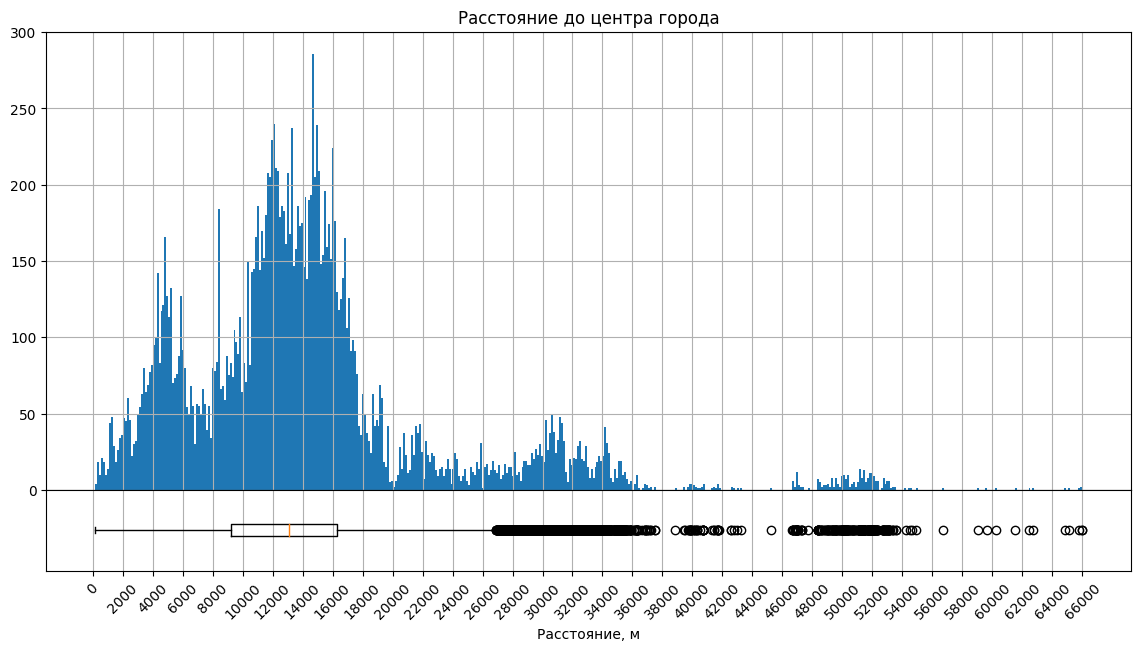

In [181]:
hist_box(df_geo['city_center_distance'], 
         'Расстояние до центра города', 
         range(0, 68000, 2000), 
         range(0, 68000, 2000), 
         'Расстояние, м', 
         bins=500)

Гистограмма имеет неравномерный характер, чередуются пики и спады значений. Пики приурочены к жилым кварталам и населенным пунктам, расположенным на определенном расстоянии от центра Санкт-Петербурга. Основное скопление объектов жилой недвижимости приходится на 3-6 км и 8-18 км. Дальше предложений наблюдается значительно меньше, а после 35 км остается совсем немного.

##### Расстояние до ближайшего аэропорта

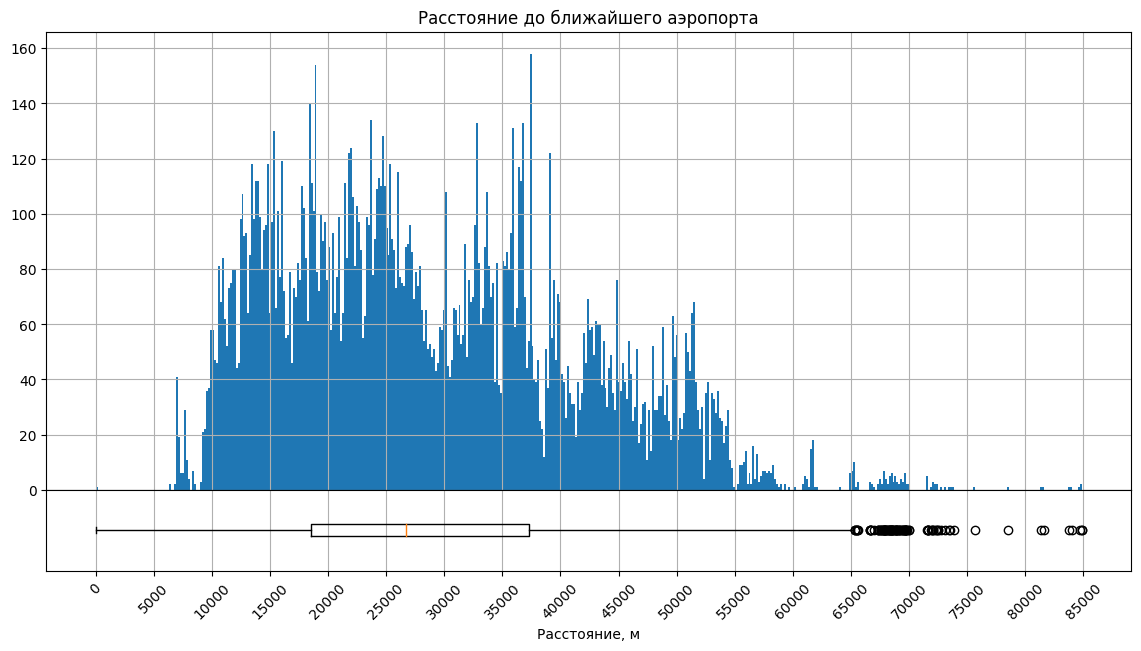

In [182]:
hist_box(df_geo['airport_distance'], 
         'Расстояние до ближайшего аэропорта', 
         range(0, 88000, 5000), 
         range(0, 88000, 5000), 
         'Расстояние, м', 
         bins=500)

Большинство квартир находятся на расстоянии 10-55 км от аэропорта.

##### Расстояние до ближайшего парка

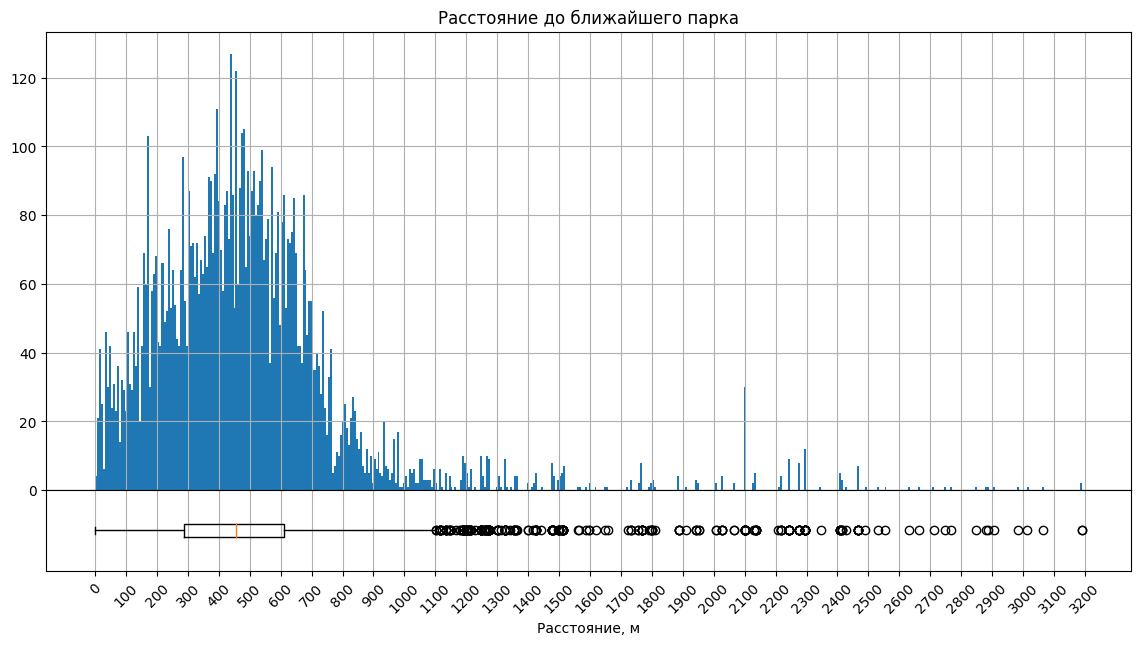

In [183]:
# прежде чем построить графики для расстояний до парков, отфильтруем объекты, где парки рядом отсутствуют:
df_park_distance = df_geo[df_geo['park_distance'] != -1]

hist_box(df_park_distance['park_distance'], 
         'Расстояние до ближайшего парка', 
         range(0, 3300, 100), 
         range(0, 3300, 100), 
         'Расстояние, м', 
         bins=500)

Чаще всего парк находится в досягаемости менее километра от жилья.

##### Расстояние до ближайшего пруда

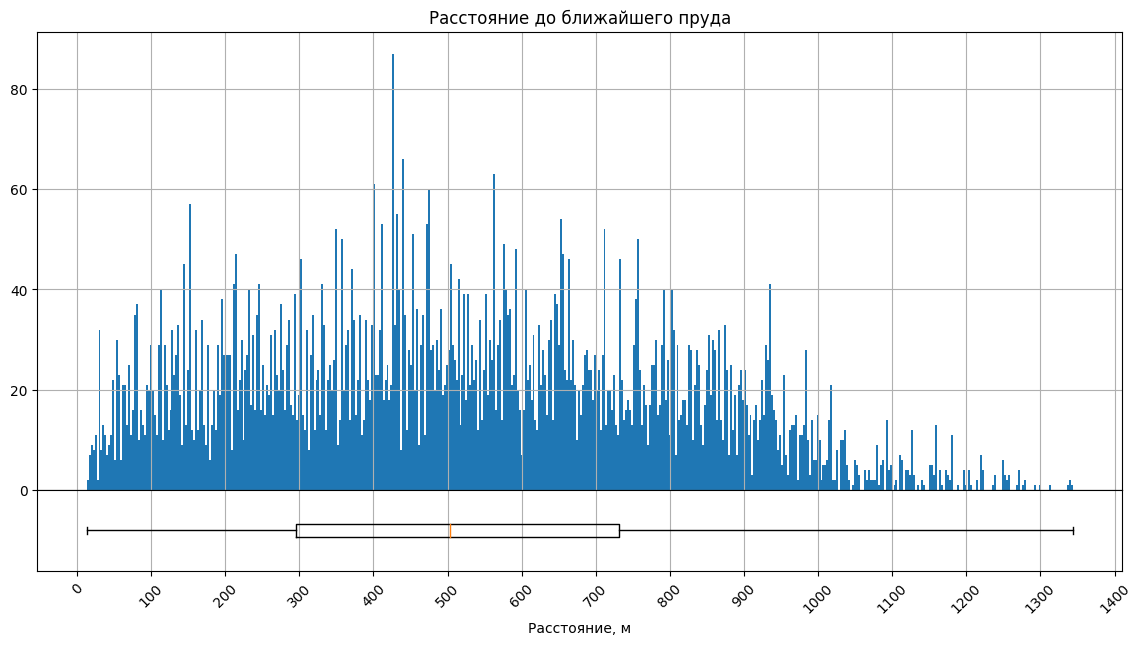

In [184]:
# прежде чем построить графики для расстояний до прудов, отфильтруем объекты, где пруды рядом отсутствуют:
df_pond_distance = df_geo[df_geo['pond_distance'] != -1]

hist_box(df_pond_distance['pond_distance'], 
         'Расстояние до ближайшего пруда', 
         range(0, 1450, 100), 
         range(0, 1450, 100), 
         'Расстояние, м', 
         bins=500)

In [185]:
df.pond_distance.describe()

count    17880.000000
mean       259.216946
std        325.806655
min         -1.000000
25%         -1.000000
50%         19.000000
75%        503.000000
max       1344.000000
Name: pond_distance, dtype: float64

Большинство прудов также находятся в досягаемости менее килотетра. Максимальное же зафиксированное расстояние около 1.35 км.

#### Изучение информации о публикации о продаже и цене квартиры

##### День, месяц и год публикации объявления

In [186]:
first_publication = df['first_day_exposition'].min()
print('Первая публикация:   ', first_publication)
last_publication = df['first_day_exposition'].max()
print('Последняя публикация:', last_publication)

Первая публикация:    2014-11-27 00:00:00
Последняя публикация: 2019-05-03 00:00:00


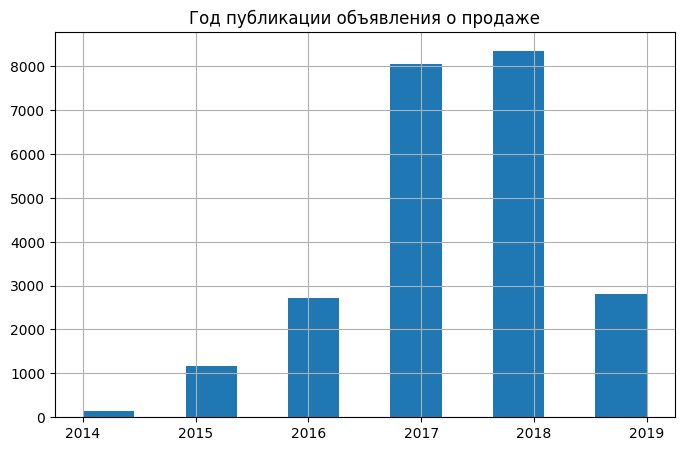

In [187]:
fig, ax = plt.subplots()
ax.hist(df['expo_year'], bins=11)
ax.set(title='Год публикации объявления о продаже')
ax.grid(True)
fig.set_figwidth(8)
fig.set_figheight(5)

Больше всего объявлений о продаже квартиры было выставлено в 2018 году. На 2014 год есть данные только за 1 месяц, а за 2019 год - только за 4 месяца. За эти годы показатели значительно меньше. Если рассмотреть динамику с 2015 по 2018 год, то можно сказать, что первые 3 года наблюдается резкий рост. Между 2017 и 2018 годом разница не столь сильна - рост замедлился. По всей видимости, гистограмма отражает развитие не только рынка недвижимости, но онлайн-сервиса Яндекса.

Чтобы оценить распределение по месяцам, оставим в выборке только данные за 2015-2018 года, чтобы каждый месяц был представлен в выборке равное количество раз.

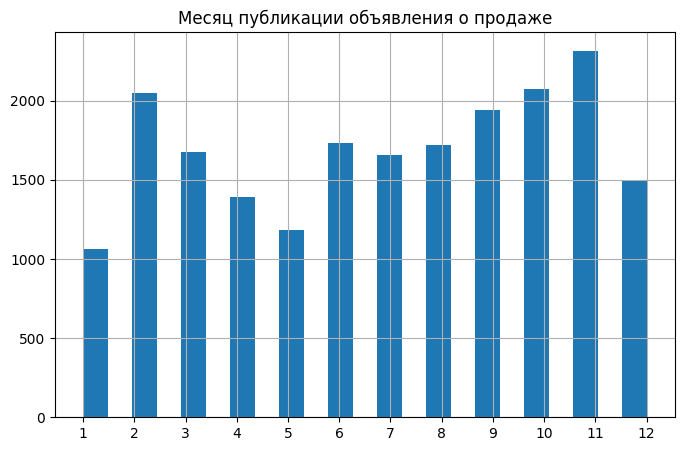

In [188]:
df_month = df.loc[(df['expo_year'] > 2014) & (df['expo_year'] < 2019)]
fig, ax = plt.subplots()
ax.hist(df_month['expo_month'], bins=23)
ax.set(title='Месяц публикации объявления о продаже', xticks=range(1, 13, 1))
ax.grid(True)
fig.set_figwidth(8)
fig.set_figheight(5)

Меньше всего объявлений выкладывается в январе и в мае, что может быть связано с большим количеством праздничных дней в эти месяцы. В последний месяц года - в декабре, также наблюдается спад активности. В феврале и в ноябре наблюдаются пики значений.

С февраля по май наблюдается постепенное снижение активности на сервисе. В летние месяцы происходит некоторый подъем, и количество новых объявлений держится примерно на одном уровне. В сентябре количество объявлений снова начинает расти и достигает своего пика в ноябре. Затем происходит резкое падение активности.

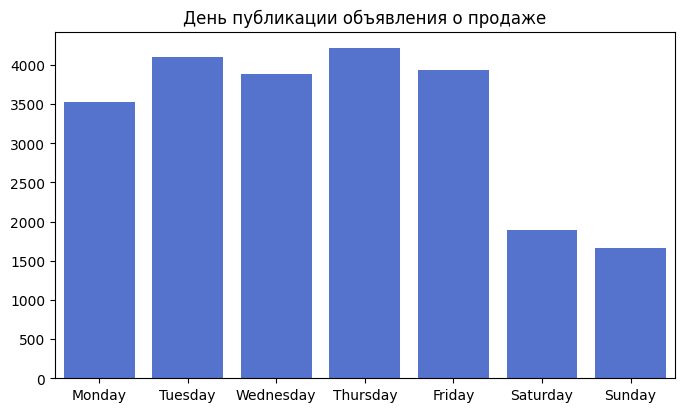

In [189]:
df_weekday = df.groupby('expo_weekday')['expo_weekday'].count()

barplot_weekday = fig = plt.figure(figsize=(8, 4.5))

barplot_weekday = sns.barplot(x=df_weekday.index, y=df_weekday, order=['Monday', 'Tuesday', 'Wednesday', 
                                                     'Thursday', 'Friday', 
                                                     'Saturday', 'Sunday'],
                              color='royalblue')
barplot_weekday.set(title='День публикации объявления о продаже')
barplot_weekday.set_ylabel('')
barplot_weekday.set_xlabel('')
plt.show()

Распределение по дням недели происходи относительно предсказуемо. В выходные дни выкладывается в два раза меньше объявлений, чем в будние. В понедельник выкладывается немного меньше объявлений, чем в остальные будние дни, а со вторнинка по пятницу количество новых объявлений на сервисе колеблется примерно на одном уровне. Наибольшее число новых объявлений, согласно имеющимся данным, появляется на сайте в четверг.

##### Исследование времени продажи квартир

О времени, за которое удалось продать квартиру, можно судить по тому, сколько дней объявление о продаже было размещено на сайте. Посмотрим статистику и построим гистограмму по этим данным.

In [190]:
df['expo_days_count'].describe()

count    23231.000000
mean       157.039086
std        213.935835
min          0.000000
25%         23.000000
50%         74.000000
75%        199.000000
max       1580.000000
Name: expo_days_count, dtype: float64

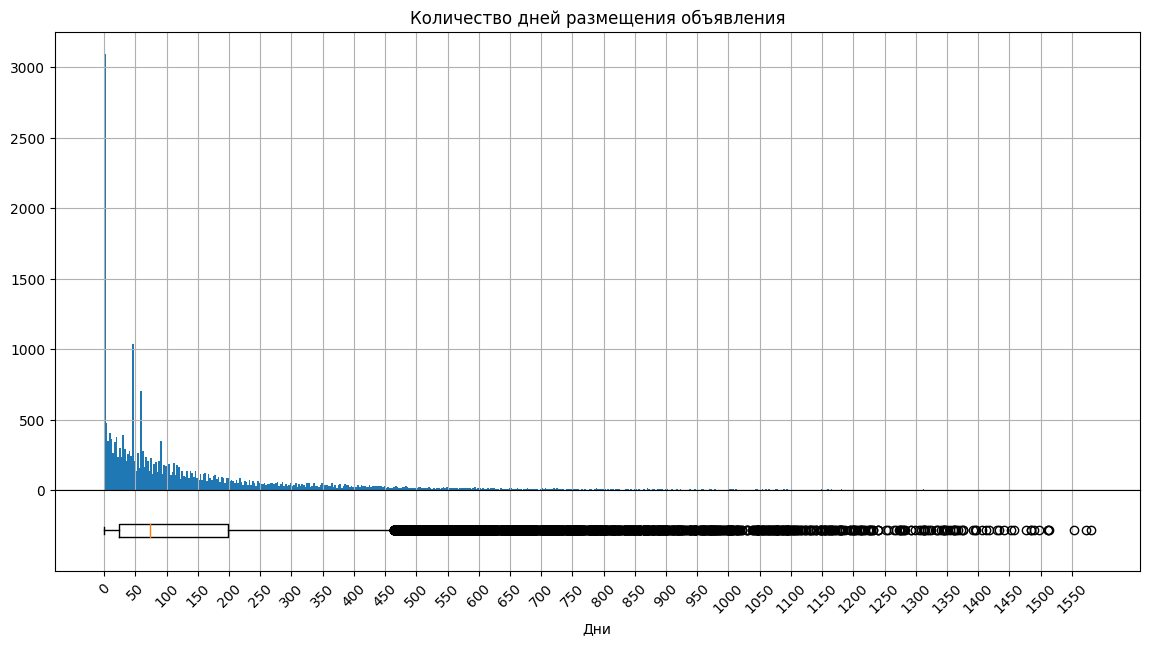

In [191]:
hist_box(df['expo_days_count'], 
         'Количество дней размещения объявления', 
         range(0, 1600, 50), 
         range(0, 1600, 50),
         'Дни', 
         bins=600)

In [192]:
df['expo_days_count'].value_counts().head(10)

0     3091
45     867
60     530
7      228
30     208
90     197
4      175
3      154
5      150
14     142
Name: expo_days_count, dtype: int64

Распределение данных на гистограмме похоже на распределение Пуассона. При этом выделяются несколько пиков значений, с помощью метода value_counts можно понять, что это 0, 45, 60, 7, 30 и 90 дней. По всей видимости, это аномалии, вызванные возможно особенностями работы сайта. Так, если объявление платное, то плату требуется вносить каждый месяц, следовательно, часть объявлений снимается по прошествии одного, двух, трех месяцев (30, 60, 90 дней). С 45-ю днями связан срок, в течении которого объявление считается актуальным. 

Очень много объявлений убрано с сайта в день размещения (0 дней). Это может происходить по разным причинам, либо квартиры сразу покупают, либо возникает ошибка и объявление переделывают, либо система убирает непрошедшие определенный контроль объявления.

Следует также учитывать, что размещать объявления на сайте бесплатно можно только на год.

Посчитать, в каком проценте случаев объявление снимается с продажи именно по причине продажи квартиры исходя из предоставленных данных не получится. Однако будем считать, что в большинстве случает это так.
На основании этого можно сделать следующие выводы о том, как быстро продаются квартиры В Санкт-Петербурге и Ленинградской области:
- Большая часть сделок происходит в первый год размещения объявления.
- Часто квартиры продаются в первый же день размещения объявления.
- Половина сделок происходи в первые 2,5 месяцы.
- Около 80% квартир продаются в первые 7 месяцев.

Таким образом, можно сказать, что если квартира была продана в первые дни - это стандартное явление, а вот если продажа затянулась более чем на год или даже два - это необычно долгий срок.

##### Цена

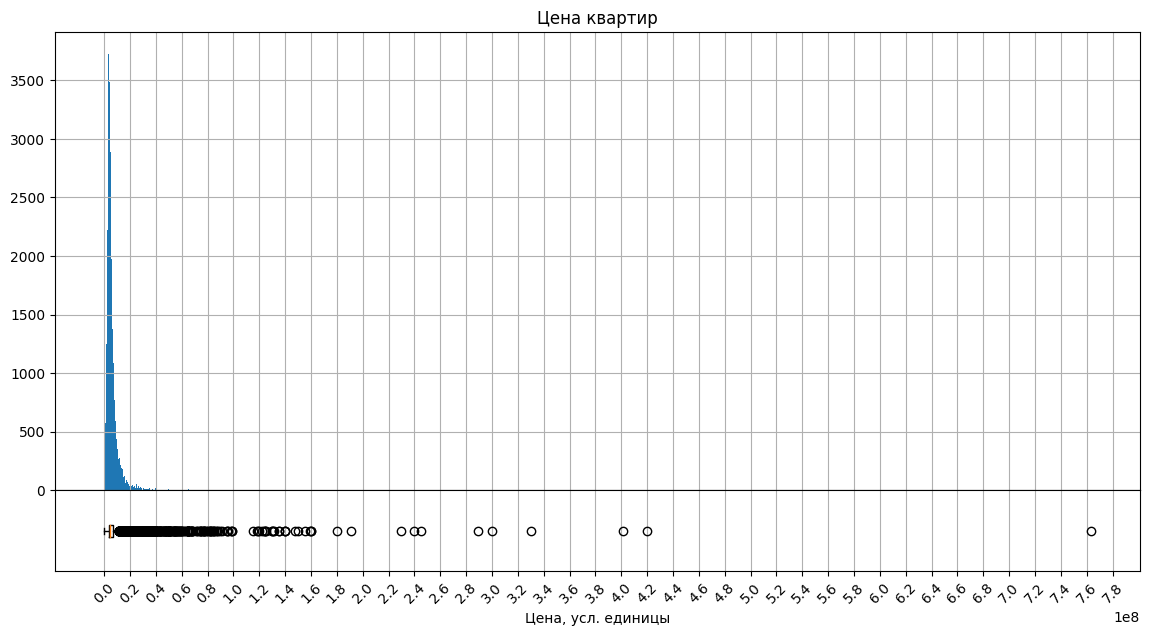

In [193]:
hist_box(df['last_price'], 
         'Цена квартир', 
         range(0, 800000000, 20000000), 
         range(0, 800000000, 20000000),
         'Цена, усл. единицы')

In [194]:
df.last_price.describe()

count    2.323100e+04
mean     6.490984e+06
std      1.081699e+07
min      1.219000e+04
25%      3.429000e+06
50%      4.636000e+06
75%      6.750000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Минимальное значение цены квартиры 12 190, максимальное - 763 000 000.    

In [195]:
print()
print('Верхняя и нижняя граница наиболее характерных значений цены:')
(
    df['last_price'].quantile([0.005, 0.975])
    .reset_index().rename(columns = {'index':'part_%'})
    .style.format({'part_%':('{:.2%}')})
)


Верхняя и нижняя граница наиболее характерных значений цены:


,part_%,last_price
0,0.50%,800000.000000
1,97.50%,22000000.000000


#### Цена квадратного метра

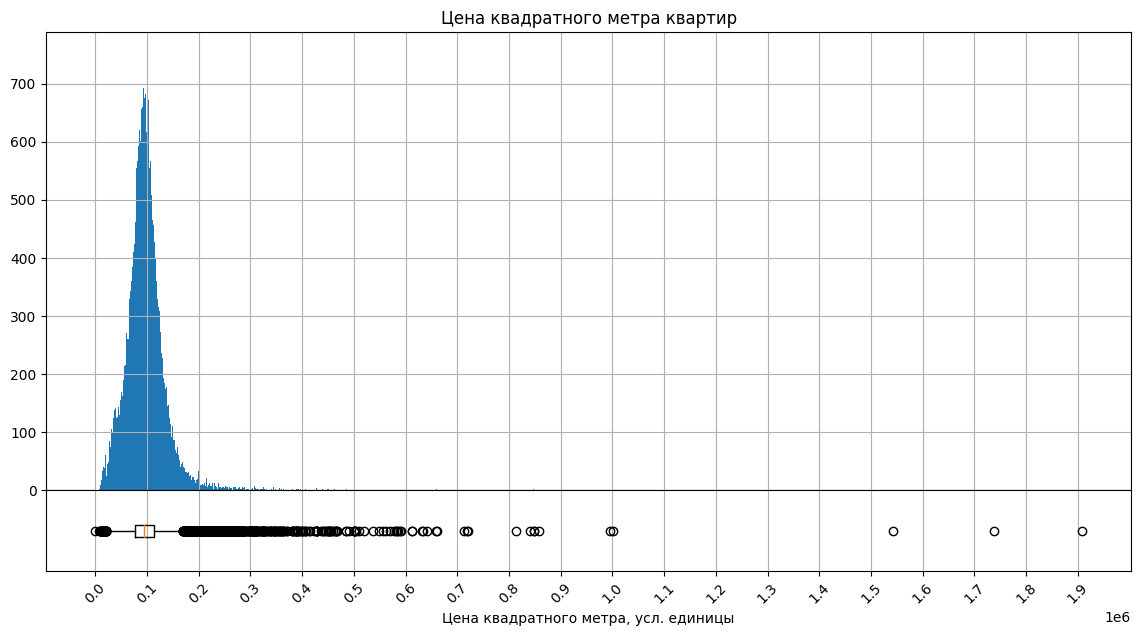

In [196]:
hist_box(df['sqm_price'], 
         'Цена квадратного метра квартир', 
         range(0, 2000000, 100000), 
         range(0, 2000000, 100000),
         'Цена квадратного метра, усл. единицы')

In [197]:
df.sqm_price.describe()

count    2.323100e+04
mean     9.915965e+04
std      4.978023e+04
min      1.118349e+02
25%      7.661703e+04
50%      9.489917e+04
75%      1.140000e+05
max      1.907500e+06
Name: sqm_price, dtype: float64

In [198]:
print()
print('Верхняя и нижняя граница наиболее характерных значений цены:')
(
    df['sqm_price'].quantile([0.005, 0.975])
    .reset_index().rename(columns = {'index':'part_%'})
    .style.format({'part_%':('{:.2%}')})
)


Верхняя и нижняя граница наиболее характерных значений цены:


,part_%,sqm_price
0,0.50%,17864.382239
1,97.50%,190801.107386


В большинстве случаев цена квадратного метра составляет примерно от 20000 до 190000.

#### Апартаменты, студии, квартиры с открытым планом

Проанализируем отдельно основные характеристики для апартаментов, студий и квартир с открытым планом.

In [199]:
def main_parameter(data):
    dict_param = {}
    dict_param['name'] = data[0]
    dict_param['count'] = len(data[1])
    dict_param['part_%'] = len(data[1])/len(df)
    dict_param['area_median'] = data[1]['total_area'].median()
    dict_param['price_median'] = data[1]['last_price'].median()
    dict_param['sqm_price_median'] = data[1]['sqm_price'].median()
    dict_param['is_spb'] = data[1]['is_spb'].mean()
    return dict_param

In [200]:
datas = [['All', df], 
         ['Studio', df[df['is_studio']]], 
         ['Open_plan', df[df['is_open_plan']]], 
         ['Apartment', df[df['is_apartment']]]]
compare_table = pd.DataFrame(columns=['name', 'count', 'part_%', 
                                      'area_median', 'price_median', 
                                      'sqm_price_median', 'is_spb'])

In [201]:
for data in datas:
    dict_data = pd.DataFrame([main_parameter(data)])
    compare_table = pd.concat([compare_table, dict_data], ignore_index=True)

In [202]:
compare_table.style.format({'part_%':('{:.2%}'), 'is_spb':('{:.2%}'), 
                            'area_median':('{:.2f}'), 'price_median':('{:.2f}'), 'sqm_price_median':('{:.2f}')})

,name,count,part_%,area_median,price_median,sqm_price_median,is_spb
0,All,23231,100.00%,52.00,4636000.00,94899.17,76.96%
1,Studio,145,0.62%,26.05,2750000.00,105555.56,62.76%
2,Open_plan,66,0.28%,27.20,2715000.00,101111.11,56.06%
3,Apartment,42,0.18%,58.35,6750000.00,110820.30,85.71%


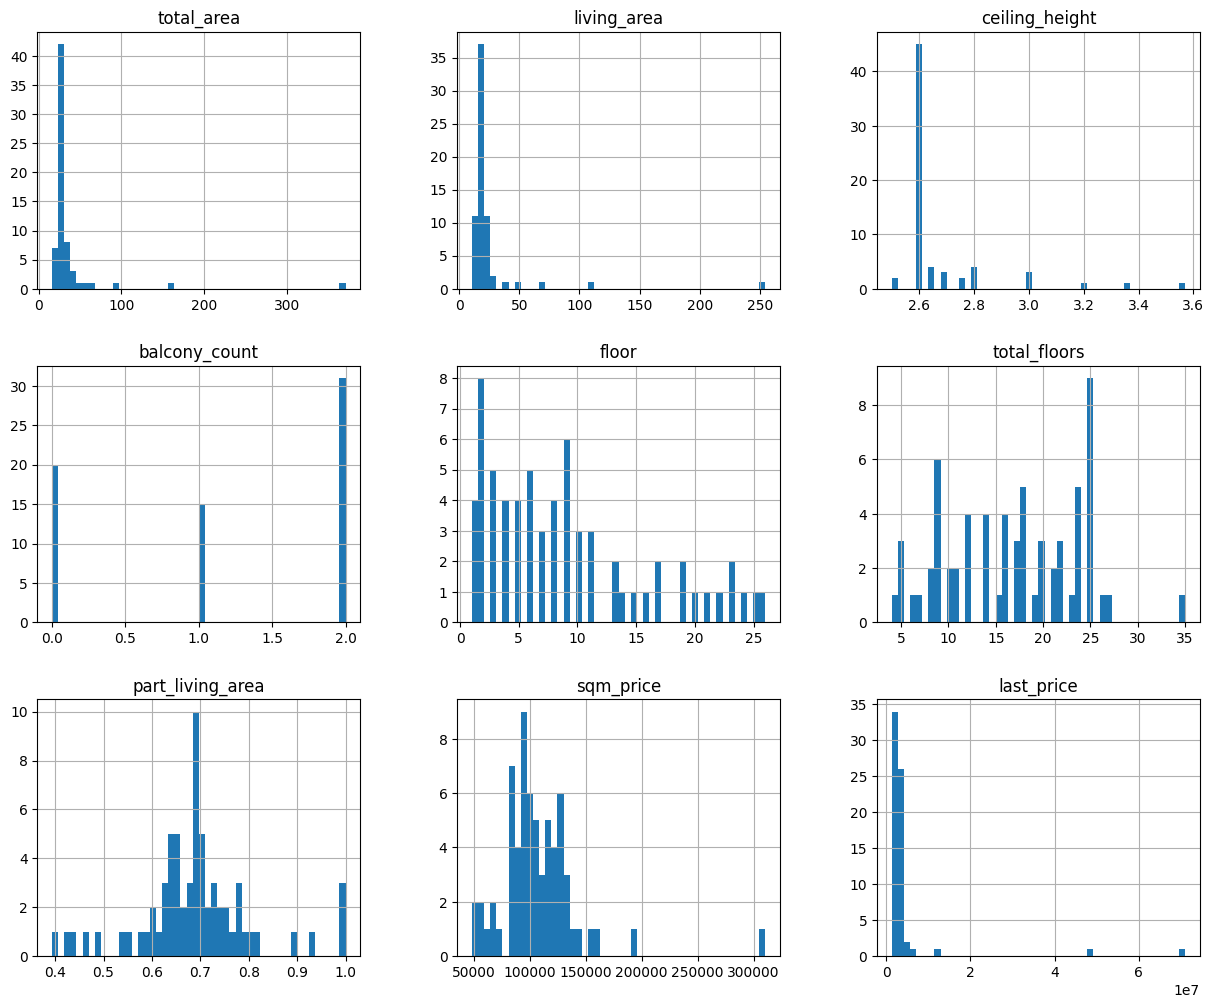

In [203]:
df[df['is_open_plan']][['total_area',
                     'living_area',
                     'ceiling_height',
                     'balcony_count',
                     'floor',
                     'total_floors',
                     'flatfloor_category',
                     'part_living_area',
                     'sqm_price',
                     'last_price']].hist(bins=48, figsize=(15, 12))
plt.show()

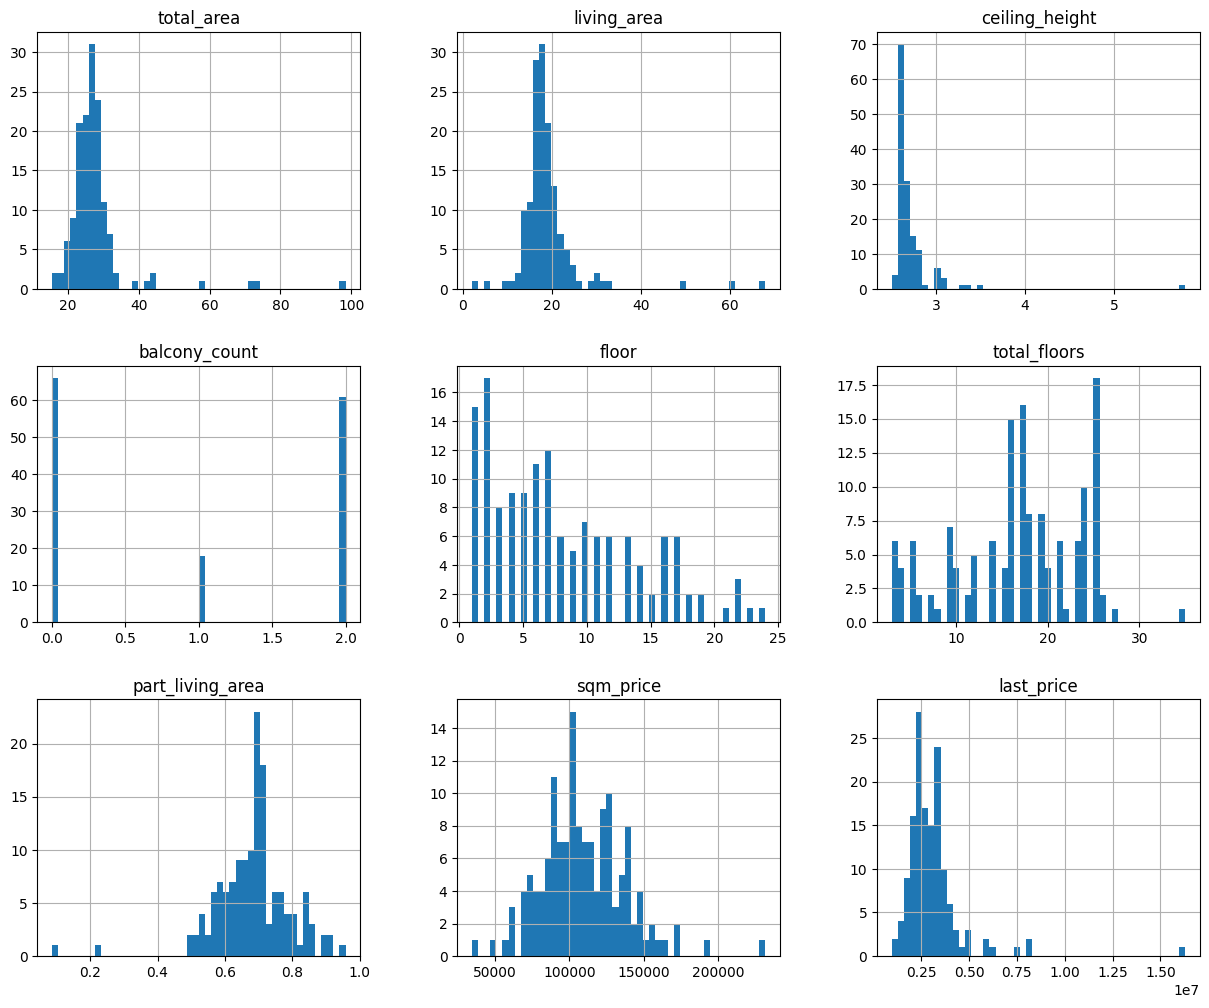

In [204]:
df[df['is_studio']][['total_area',
                     'living_area',
                     'ceiling_height',
                     'balcony_count',
                     'floor',
                     'total_floors',
                     'flatfloor_category',
                     'part_living_area',
                     'sqm_price',
                     'last_price']].hist(bins=48, figsize=(15, 12))
plt.show()

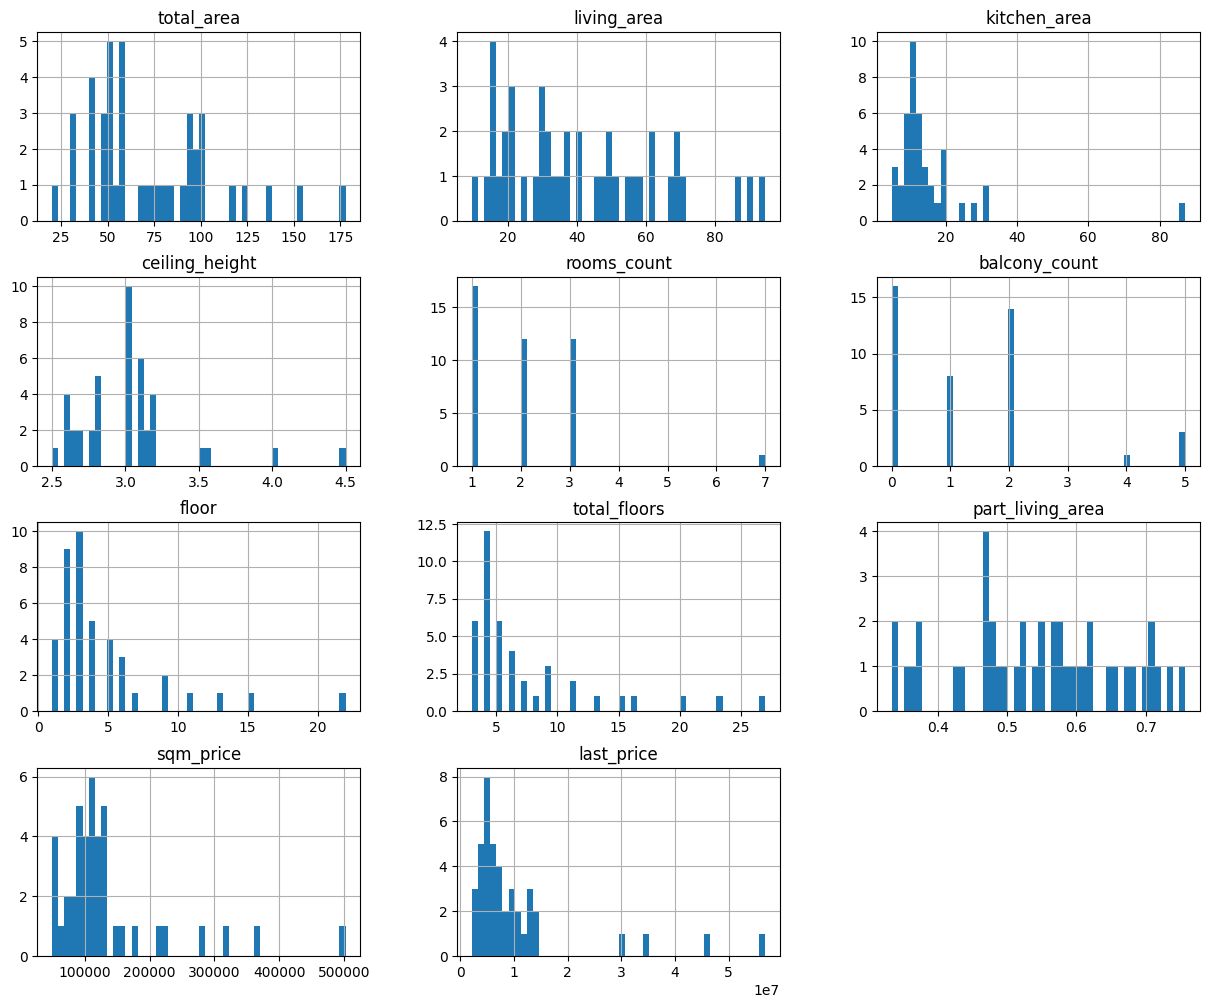

In [205]:
df[df['is_apartment']][['total_area',
                     'living_area',
                     'kitchen_area',
                     'ceiling_height',
                     'rooms_count',
                     'balcony_count',
                     'floor',
                     'total_floors',
                     'flatfloor_category',
                     'part_living_area',
                     'sqm_price',
                     'last_price']].hist(bins=48, figsize=(15, 12))
plt.show()

Особенности студий, квартир с открытым планом и апартаментов:

1. Жилые объекты, относящиеся к этим категориям представлены в наборе данных в небольшом количестве:
    - 145 студий
    - 66 квартир с открытым планом
    - 42 апартамента   
   Возможно таких квартир на самом деле больше, но не во всех объявлениях посчитали нужным указать эту категорию.
   Из-за того, что выборки небольшие, выводы могут быть не вполне достоверными, но оценку таких квартир мы все же проведем.
2. Медианное значение площадей квартир студий и квартир с открытым планом примерно в два раза меньше (26 и 27 кв.м соответственно), чем значение по квартирам для всего набора данных (52 кв.м). Апартаменты же наоборот несколько больше по площади (58 кв.м).
3. Стоимость студий и квартир с открытым планом ниже из-за небольших площадей. Апартаменты же заметно дороже, чем квартиры в среднем. При этом стоимость одного квадратного метра у всех трех категорий больше, чем в среднем по набору данных. Аппартаменты являются самой дорогой категорией жилья.
4. Большая часть апартаментов расположена на территории Санкт-Петербурга. Студий и квартир с открытым планом в области почти также много как в Северной столице.
5. По гистограммам видно, что студии и квартиры с открытым планом чаще расположены в высотках. Апартаменты наоборот обычно тяготеют к низкоэтажной застройке.

#### Обзор рынка недвижимости

Рынок недвижимости в Ленинградской области в 2014-2019 годах можно охарактеризовать следующим образом:
 - цены на квартиры в основном колеблются от 800 000 до 22 000 000, хотя есть и предложения значительно дороже
 - большая часть представленных квартир имеет общую площадь 26 до 136 кв.м. 
 - жилая площадь при этом составляет как правило от 35% до 75% от общей и колеблется в районе 13-83 кв.м.
 - площадь кухни обычно составляет от 5 до 27 кв.м.
 - в значениях о высоте потолков было много ошибок и пропусков. После очистки от аномалий и заполнения пустых значений медианными удалось установить, что высота потолков имеет определенные стандартные значения. Большая часть квартир имеют высоту потолков от 2.5 до 3.5 м.
 - стандартное число комнат 1-6. Есть также квартиры студии, где жилое пространство неотделимо от кухни и тп. и есть квартиры с открытым планом, где число комнат может зависеть от пожеланий владельца
 - более половины представленных объектов недвижимости не имеют балконов. Максимально число балконов в квартире составляет 5.
 - этажность застройки подчиняется определенным стандартам больше всего пятиэтажных и девятиэтажных домов

### Очистка редких и выбивающихся значений в столбцах с информацией о площади квартир, цене, числе комнат, высоте потолков

Чтобы проанализировать влияние различных факторов на стоимость объектов недвижимости, создадим выборку с типовыми квартирами, исключающую значения-выбросы.  

Фильтровать выбросы будем по следующим характеристикам:
- общая площадь
- жилая площадь
- площадь кухни
- число комнат
- цена квартиры

Новый набор данных назовем __df_common__. 

Убедимся также, что удаленные данные составляют не более 10% от общего объема.

In [206]:
df_common = df.query('26 <= total_area <= 136')
df_common = df_common.query('13 <= living_area <= 83')
df_common = df_common.query('5 <= kitchen_area <= 27')
df_common = df_common.query('rooms_count <= 6')
df_common = df_common.query('800000 <= last_price <= 22000000')


rare_part = 1 - len(df_common) / len(df)

print(f'Доля редких и выбивающихся значений составила {rare_part:.2%}')
print('Количество строк в наборе данных df_common:', len(df_common))

Доля редких и выбивающихся значений составила 8.21%
Количество строк в наборе данных df_common: 21324


### Зависимость цен на квартиры от различных факторов

#### Функции

In [207]:
# функция построения тепловой карты для показателей корреляции
def corr_heatmap(data, colors, length):
    plt.figure(figsize=(length, 0.3))
    (
    sns.heatmap(data
                .corr()[['last_price']]
                .sort_values(by='last_price', ascending=False).T, 
                cmap=colors, annot=True, cbar= False)
    )
    plt.xticks(rotation=40)
    plt.yticks(rotation=0)

In [208]:
# функция построения точечной диаграммы 
def scatter_plot_corr(data, title, ylabel):
    df_common.plot(x='last_price', y=data, kind='scatter', alpha=0.1, title = title, 
                   figsize=(9, 5), grid=True, )
    
    plt.xlabel('Цена, усл.ед.')
    plt.ylabel(ylabel)
    plt.show()

    corr_ = df_common['last_price'].corr(df_common[data])
    print(f'Kоэффициент корреляции Пирсона: {corr_:.3f}')

In [209]:
# функция построения диаграммы размаха
def boxplot_corr(x, title, xlabel, figsize=(10, 5)):
    sns.set_style('whitegrid')
    plt.figure(figsize=figsize)
    sns.boxplot(x=df_common[x],
                y=df_common['last_price'], 
                boxprops={"facecolor": (.4, .6, .8, .5)},
                width=0.4, flierprops={"marker": "."})
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Цена, усл.ед.')
    plt.show()

#### Оценка линейной зависимости цены квартиры от ее различных характеристик

Создадим списки характеристик, для которых будем оценивать прямую зависимость от цены.

In [210]:
geo_data_corr = ['last_price', 'airport_distance', 'city_center_distance', 'parks_count', 
                 'park_distance', 'ponds_count', 'pond_distance', 'is_spb']

In [211]:
public_data_corr = ['total_images_count', 'last_price', 'expo_days_count', 
                    'expo_year', 'expo_month', 'expo_weekday_num']

In [212]:
flat_data_corr = ['last_price', 'total_area', 'rooms_count', 'ceiling_height', 'total_floors', 'living_area',
                  'floor', 'kitchen_area', 'balcony_count',
                  'part_living_area', 'part_kitchen_area']

Построим тепловые карты, чтобы оценить, есть ли прямая зависимость между различными характеристиками и ценой квартиры.

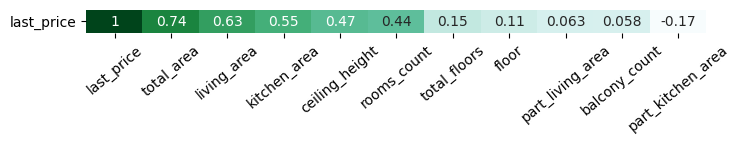

In [213]:
corr_heatmap(df_common[flat_data_corr], 'BuGn', 8)

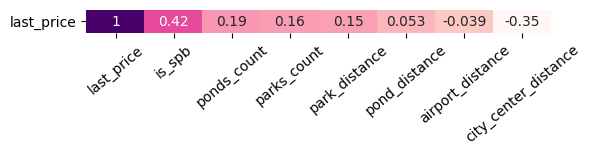

In [214]:
corr_heatmap(df_common[geo_data_corr], 'RdPu', 6)

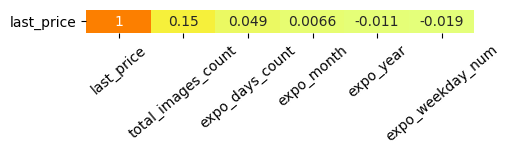

In [215]:
corr_heatmap(df_common[public_data_corr], 'Wistia', 5)

Сильная прямая корреляция наблюдаемся между ценой и общей площадью квартиры, а также площадью кухни и жилой площадью.  
Слабая корреляция есть также с количеством комнат. Жилая площадь, площадь кухни и количество комнат зависят от площади квартиры, поэтому общая площадь квартиры играет тут первостепенную роль, и чем она больше, тем соответственно больше цена.

Слабая корреляция прослеживается между ценой и высотой потолков. То есть, квартиры с высокими потолками стоят несколько дороже. Обычно это квартиры в старых районах города. 

Слабая прямая связь есть также между тем, находится ли квартира на территории Санкт-Петербурга. В пределах Северной столицы жилье несколько дороже.

Слабая обратная связь цены наблюдается с расстоянием до центра Санкт-Петербурга.

Остальные характеристики не показали заметной прямой или обратной корреляция с ценой квартиры. Однако это не значит, что они не влияют на цену, просто характер этого влияния может быть более сложным.

#### Характеристики, показавшие корреляцию с ценой квартиры

Рассмотрим подробнее следующие характеристики, показавшие корреляцию с ценой:

- общая площадь
- жилая площадь
- площадь кухни
- количество комнат
- высота потолка

Влияние вхождения в Санкт-Петербург рассмотрим ниже, при рассмотрении цен на жилую недвижимость в различных городах.

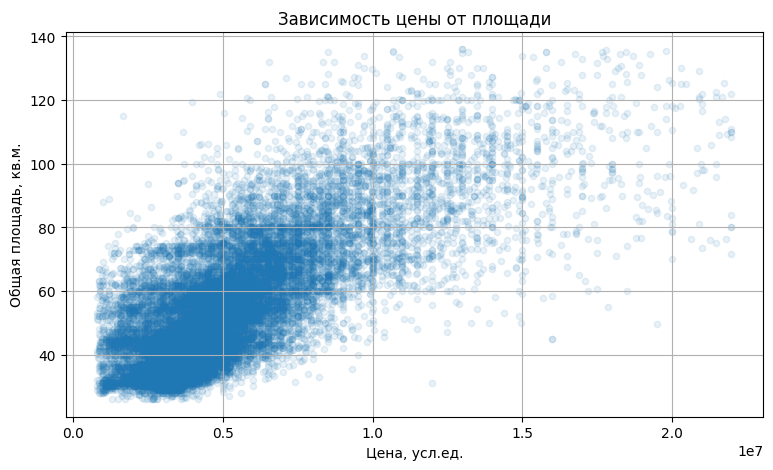

Kоэффициент корреляции Пирсона: 0.739


In [216]:
scatter_plot_corr('total_area', 'Зависимость цены от площади', 'Общая площадь, кв.м.')

Как видно из графика, стоимость объекта недвижимости находится в прямой зависимости от его площади. Однако у квартир с одинаковой площадью есть некоторый диапазон цен. Чем больше площадь квартиры, тем больше становится этот диапазон.

Коэффициент корреляции Пирсона довольно высок, это указывает на сильное влияние общей площади квартиры на ее цену.

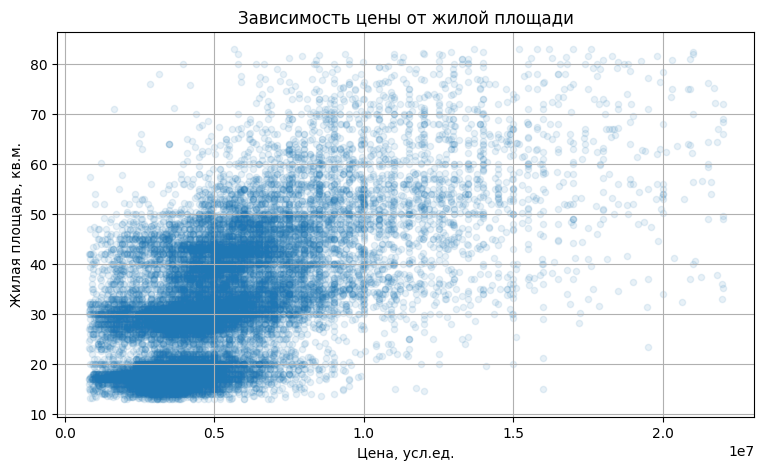

Kоэффициент корреляции Пирсона: 0.627


In [217]:
scatter_plot_corr('living_area', 'Зависимость цены от жилой площади', 'Жилая площадь, кв.м.')

График зависимости цены от жилой площади квартиры имеет схожую тенденцию с графиком зависимости цены от общей площади квартиры. Но есть особенности. Так, наблюдаются скопления точек вдоль осей со значением жилой площади в 18 кв.м и 30 кв.м. По всей видимости, такое распределение отражает типовые планировки квартир. При этом ценовой диапазон на такие квартиры с одинаковой жилой площадью довольно широк. Это говорит о влиянии на цену и других факторов. 

Коэффициент корреляции Пирсона подтверждает существование зависимость между ценой на квартиру и жилой площадью, однако эта зависимость меньше, чем от общей площади объекта.

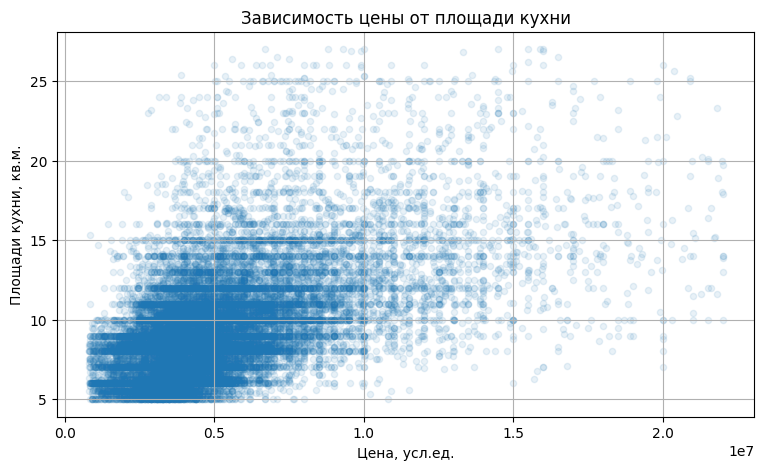

Kоэффициент корреляции Пирсона: 0.546


In [218]:
scatter_plot_corr('kitchen_area', 'Зависимость цены от площади кухни', 'Площади кухни, кв.м.')

Влияние площади кухни на цену менее значительно, чем влияние жилой площади. Это видно как на диаграмме рассеяния, так и по коэффициенту корреляции Пирсона. Разброс цен для квартир с одинаковой площадью кухни еще больше чем для квартир с одинаковой жилой площади.
Можно сказать лишь о небольшой прямой зависимости между этими показателями. Фактически, квартиры с определенной площадью кухни можно найти практически в любом ценовом диапазоне.

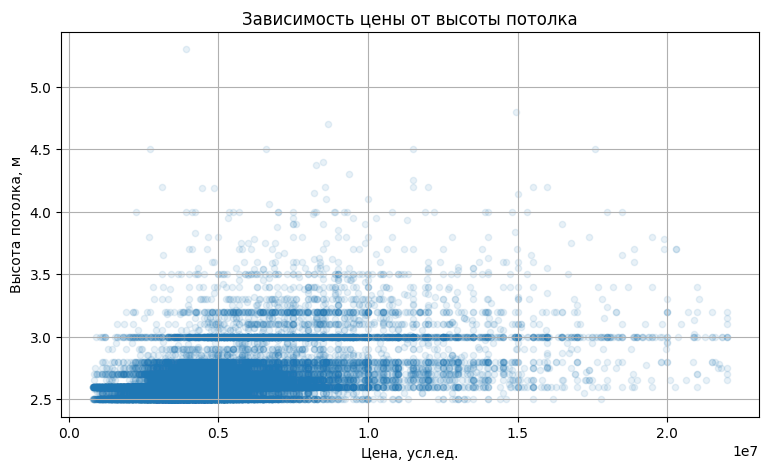

Kоэффициент корреляции Пирсона: 0.469


In [219]:
scatter_plot_corr('ceiling_height', 'Зависимость цены от высоты потолка', 'Высота потолка, м')

Как видно, зависимость цены от высоты потолка действительно слабая. Квартиры с низкими потолками с высотой 2.5 м действительно стоят относительно недорого. Квартиры со стандартной высотой потолков от 2.6 до 2.8 м имеют чуть повышающийся, но все же примерно равный ценовой диапазон. Квартиры с высотой потолка 3 м в среднем имеют цены уже чуть выше, но также представлены во всех ценовых категориях. Для больших характеристик диаграмма имеет более рассеянный вид с широким диапазоном цен.

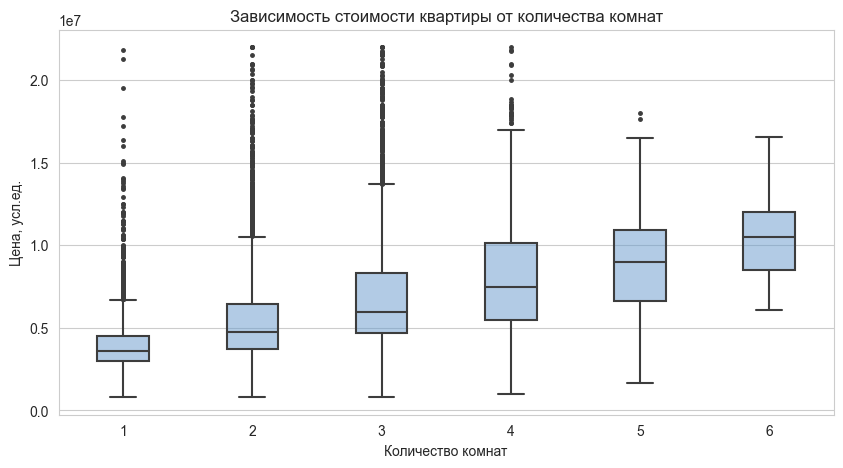

In [220]:
boxplot_corr('rooms_count', 
             'Зависимость стоимости квартиры от количества комнат', 
             'Количество комнат')

Диаграмма показывает прямую зависимость цены от количества комнат. Однако коэффициент Пирсона не слишком велик, а значит влияние этой характеристики на стоимость объектов недвижимости не сильное. В целом, видно, что медианные значения немного растут с количеством комнат, что не удивительно, ведь увеличивается площадь, однако однако разброс стоимости для каждого количества комнат довольно широк.

#### Оценка влияния категориальных характеристик на цену.

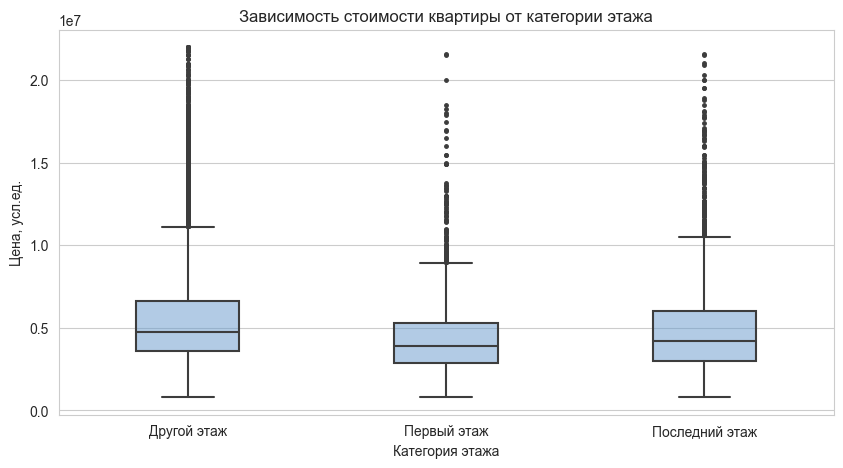

In [221]:
boxplot_corr('flatfloor_category', 
             'Зависимость стоимости квартиры от категории этажа', 
             'Категория этажа')

Чем больше этажей в здании, тем больше цена квартиры.

Первые и последние этажи зданий в силу различных причин считаются менее благоприятными для жизни. Это отражается на стоимости квартир на этих этажах. Дешевле всего квартиры на первом этаже. Далее идут квартиры на втором этаже. Медианное значение стоимости квартир на остальных этажах оценивается выше всего.

In [222]:
df[df['is_studio']][flat_data].describe()

,total_area,rooms_count,ceiling_height,total_floors,living_area,floor,kitchen_area,balcony_count,part_living_area,part_kitchen_area
count,145.000000,145.0,145.000000,145.000000,145.000000,145.000000,145.0,145.000000,145.000000,145.0
mean,27.827517,0.0,2.713655,16.586207,18.944836,8.103448,0.0,0.965517,0.681724,0.0
std,9.426137,0.0,0.301127,6.862323,7.222550,5.863877,0.0,0.938481,0.111243,0.0
min,15.500000,0.0,2.500000,3.000000,2.000000,1.000000,0.0,0.000000,0.086957,0.0
25%,24.000000,0.0,2.600000,12.000000,16.000000,3.000000,0.0,0.000000,0.625000,0.0
50%,26.050000,0.0,2.600000,17.000000,18.000000,7.000000,0.0,1.000000,0.686237,0.0
75%,29.000000,0.0,2.750000,23.000000,19.900000,12.000000,0.0,2.000000,0.728507,0.0
max,98.400000,0.0,5.800000,35.000000,68.000000,24.000000,0.0,2.000000,0.957746,0.0


#### Зависимость цены от даты размещения объявления

Посмотрим, зависит ли цена от даты размещения объявления. Рассмотрим такие показатели как день недели, месяц и год. Построим графики.

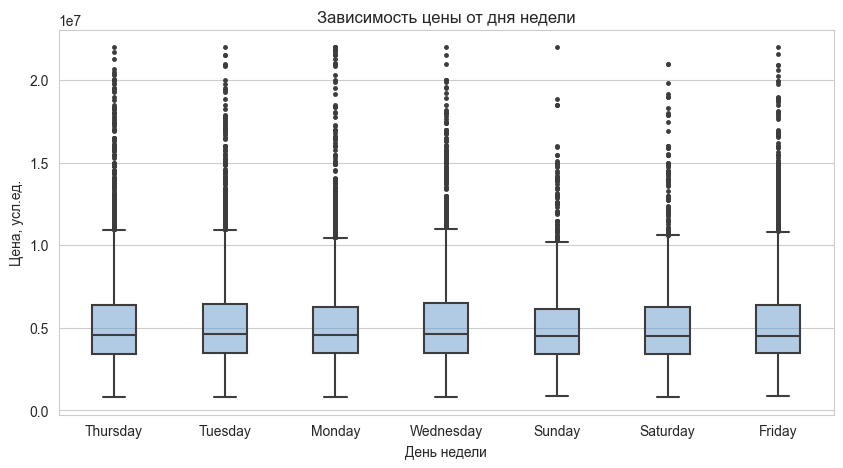

In [223]:
boxplot_corr('expo_weekday', 
             'Зависимость цены от дня недели', 
             'День недели')

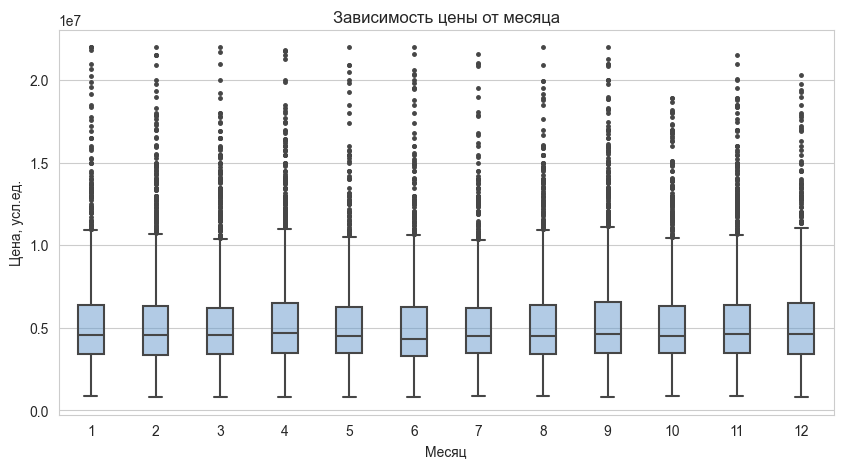

In [224]:
boxplot_corr('expo_month', 
             'Зависимость цены от месяца', 
             'Месяц')

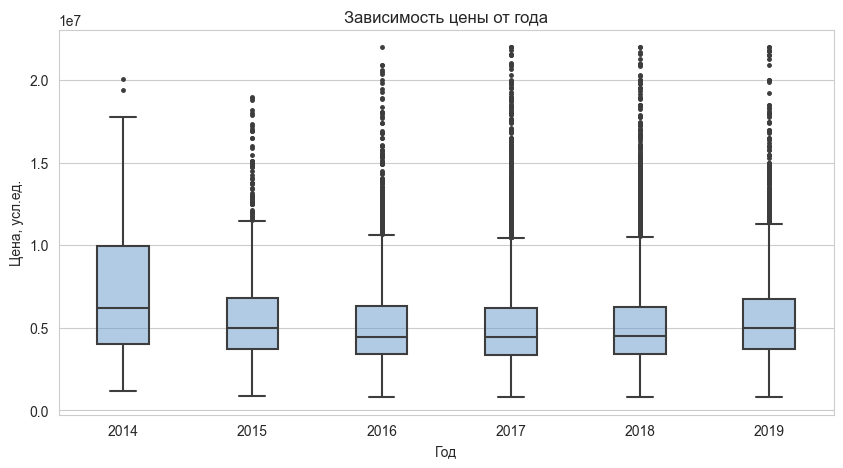

In [225]:
boxplot_corr('expo_year', 
             'Зависимость цены от года', 
             'Год')

Зависимости цены от дня недели или месяца размещения объявления не наблюдается. При этом цена недвижимости колеблется от года к году. Так в 2016 и 2017 годах наблюдалось понижение, а в 2014 и 2019 - повышение стоимости жилья.

### Населенные пункты с наибольшим числом объявлений

Выделим 10 населенных пунктов с наибольшим числом объявлений:

In [226]:
df_locality10 = df.groupby(by='locality_name')['locality_name'].count().sort_values(ascending=False).head(10)
df_locality10

locality_name
Санкт-Петербург    15436
Мурино               575
Кудрово              467
Шушары               433
Всеволожск           392
Пушкин               363
Колпино              333
Парголово            325
Гатчина              301
Выборг               232
Name: locality_name, dtype: int64

Посмотрим, какова цена 1 кв.м в этих населенных пунктах:

In [227]:
df_geo_10 = df[df['locality_name'].isin(df_locality10.index)]
df_geo_10_price = df_geo_10.groupby(by='locality_name')['sqm_price'].mean().sort_values(ascending=False)
df_geo_10_price

locality_name
Санкт-Петербург    114469.329265
Пушкин             103179.461280
Кудрово             95256.325419
Парголово           90164.551032
Мурино              85863.965949
Шушары              78392.169346
Колпино             75581.725352
Гатчина             68828.249230
Всеволожск          68674.055688
Выборг              58468.528867
Name: sqm_price, dtype: float64

Выше всего стоимость квадратного метра жилья в Санкт-Петербурге, на втором месте Пушкин, на третьем Кудрово. Ниже всего из 10 выбранных населенных пунктов этот показатель в  Выборге.

### Исследование рынка недвижимости Санкт-Петербурга

#### Выборка объектов, расположенных на территории Санкт-Петербурга

Создадим набор данных для типовых объектов недвижимости на территории Санкт-Петербурга.

In [228]:
df_spb = df_common[df_common['is_spb'] == True]

Для построения наглядного графика зависимотсти цены от удаленности от центра, округлим километры до целых и посчитаем среднее значение цены для каждого километра.

In [229]:
df_spb = df_spb.astype({'center_distance_km': 'int64'})
df_spb_center = df_spb.groupby(by='center_distance_km')['last_price'].mean().reset_index()

Расстояние до аэропорта также рассмотрим в километрах. Создадим для этого отдельных столбец `airport_distance_km`.

In [230]:
df_spb['airport_distance_km'] = df_spb['airport_distance'] * 0.001
df_spb = df_spb.astype({'airport_distance_km': 'int64'})
df_spb_airport = df_spb.groupby(by='airport_distance_km')['last_price'].mean().reset_index()

В данных о расстоянии до парков и до прудов есть значения равные -1, они соответствуют отвутствую праков и прудов в пределах трех километров. Отфильтруем такие значения для графиков.

In [231]:
df_spb_park = df_spb[df_spb['park_distance']>=0][['park_distance', 'last_price']].sort_values(by='park_distance')
df_spb_pond = df_spb[df_spb['pond_distance']>=0][['pond_distance', 'last_price']].sort_values(by='pond_distance')

#### Функции для графиков

In [232]:
# функция построения совместного графика для средних значений и точечной диаграммы
def price_km_plot(x1, y1, x2, y2, title, color1, color2, xticks):
    fig = plt.figure(figsize=(11, 4.5))

    ax = fig.add_subplot()

    ax.plot(x1, y1, color=color1)
    ax.scatter(x2, y2, alpha=0.3, color=color2)

    ax.set(title=title)
    ax.grid(color = 'gainsboro')

    ax.set_ylabel('Цена, усл. ед.')
    ax.set_xlabel('Расстояние, км')
    plt.xticks(xticks)
    plt.grid()

    plt.show()

In [233]:
# функция для точечной диаграммы
def park_pond_dist(data, x, xticks, title, color='yellowgreen'):
    data.plot(x = x, y = 'last_price', 
              kind='scatter', alpha=0.31, 
              xticks=(xticks), 
              color=color,
              title=title, 
              grid=True, figsize=(12, 4.5), xlabel='Расстояние, м', ylabel='Цена, усл. ед.')
plt.show()

#### Изменение цены на разном расстоянии от центра Санкт-Петербурга

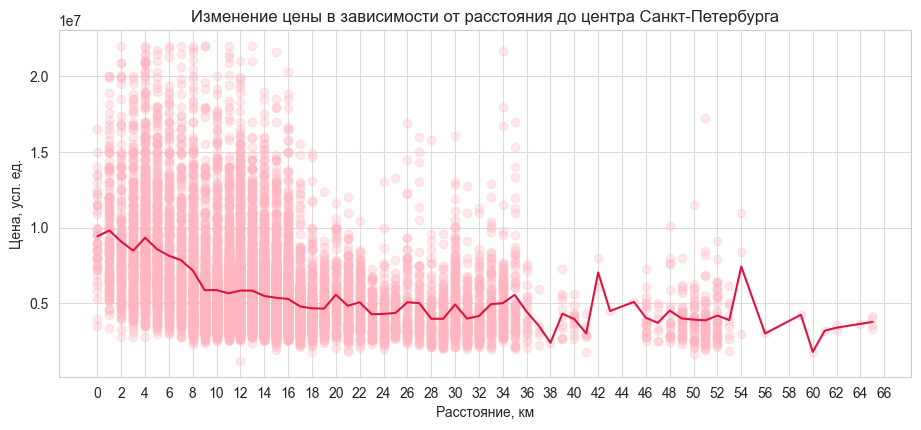

In [234]:
price_km_plot(df_spb_center['center_distance_km'], df_spb_center['last_price'], 
              df_spb['center_distance_km'], df_spb['last_price'], 
              'Изменение цены в зависимости от расстояния до центра Санкт-Петербурга', 
              'crimson', 'lightpink', 
              (range(0, 67, 2)))

В центральной зоне Санкт-Петербурга (радиусом около 4 км) цены на недвижимость наиболее высоки. С 4 по 16-й километр средняя цена постепенно падает и после 16-го километра держится примерно на одном уровне. Несколько пиков на графике вызваны скорее небольшим количеством объектов на данном километре, а не реальным повышением цен.  

#### Изменение цены на разном расстоянии от аэропорта

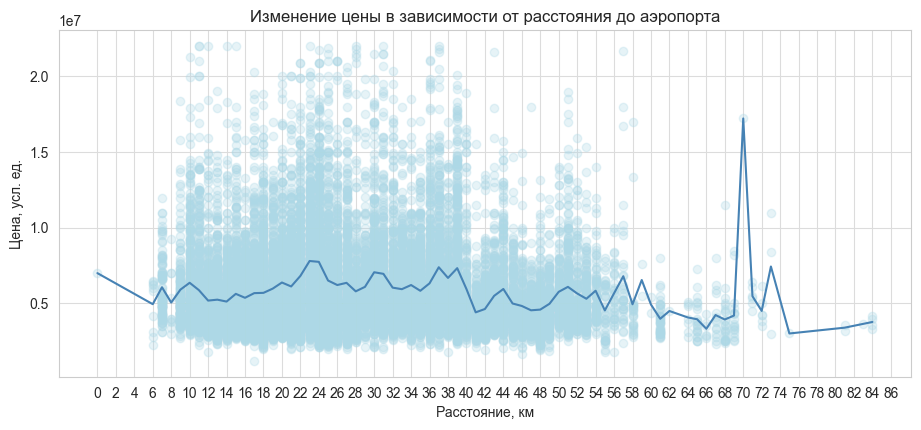

In [235]:
price_km_plot(df_spb_airport['airport_distance_km'], df_spb_airport['last_price'], 
              df_spb['airport_distance_km'], df_spb['last_price'], 
              'Изменение цены в зависимости от расстояния до аэропорта', 
              'steelblue', 'lightblue',
              range(0, 88, 2))

По графику видно, что средние цены на разном расстоянии от аэропорта колеблются примерно на одном уровне. После 60-го километра наблюдается некоторый спад, но он скорее всего связан не с расстоянием до аэропорта, а с какими-то другими факторами, например, с малым количеством населенных пунктов. Резкий всплеск на 70-ом километре возникает из-за малого количества объектов, он не отображает реального скачка цен на рынке.

#### Изменение цены в зависимости от наличия парков и прудов

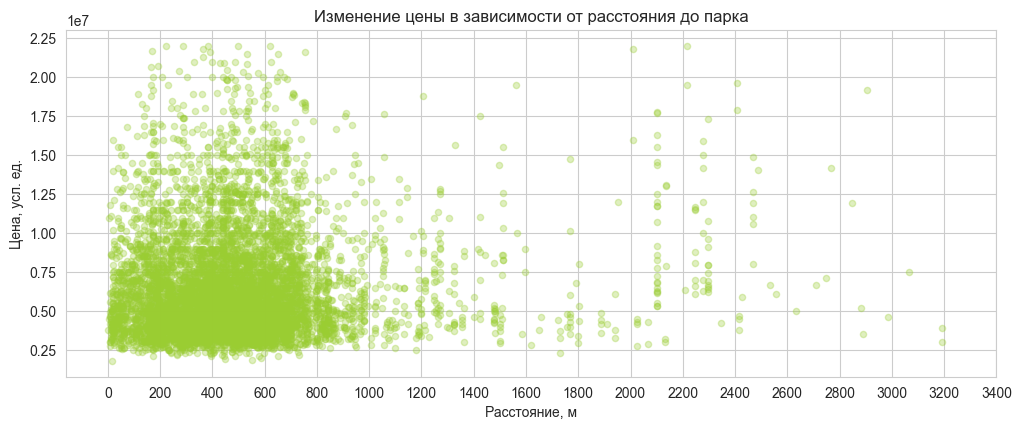

In [236]:
park_pond_dist(df_spb_park, 'park_distance', range(0, 3500, 200), 
               'Изменение цены в зависимости от расстояния до парка')

Большинство парков находятся в пределах первого километра от объектов недвижимости, однако расстояние до парка не оказыват занчительного влияния на цену недвижимости.  

Сравним, отличается ли цены для квартир, где парк расположен в пределах одного километра и цены для квартир без парков поблизости.

In [237]:
print('Квартиры рядом с парками:')
df_spb.query('0 < park_distance <= 1000')['last_price'].describe()

Квартиры рядом с парками:


count    6.684000e+03
mean     6.490505e+06
std      3.335736e+06
min      1.800000e+06
25%      4.200000e+06
50%      5.500000e+06
75%      7.799250e+06
max      2.200000e+07
Name: last_price, dtype: float64

In [238]:
print('Квартиры без парков рядом:')
df_spb.query('park_distance == -1')['last_price'].describe()

Квартиры без парков рядом:


count    9.324000e+03
mean     5.598131e+06
std      2.580327e+06
min      1.200000e+06
25%      3.900000e+06
50%      4.882500e+06
75%      6.500000e+06
max      2.200000e+07
Name: last_price, dtype: float64

Цены на квартиры без парков несколько ниже. Ниже медианные и средние значения. Меньше при этом и стандартное отклонение, то есть разброс цен для квартир без парков не такой сильный, как для жилья с зелеными территориями поблизости.

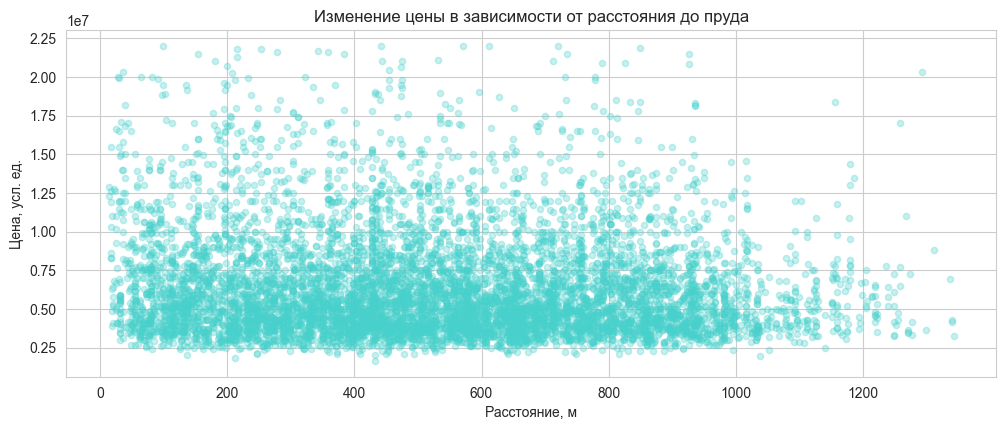

In [239]:
park_pond_dist(df_spb_pond, 'pond_distance', range(0, 1400, 200), 
               'Изменение цены в зависимости от расстояния до пруда', color='mediumturquoise')

In [240]:
print('Квартиры рядом с прудами:')
df_spb.query('0 < pond_distance')['last_price'].describe()

Квартиры рядом с прудами:


count    7.938000e+03
mean     6.360183e+06
std      3.247499e+06
min      1.650000e+06
25%      4.100000e+06
50%      5.400000e+06
75%      7.600000e+06
max      2.200000e+07
Name: last_price, dtype: float64

In [241]:
print('Квартиры без прудов рядом:')
df_spb.query('pond_distance == -1')['last_price'].describe()

Квартиры без прудов рядом:


count    8.401000e+03
mean     5.660737e+06
std      2.666601e+06
min      1.200000e+06
25%      3.950000e+06
50%      4.900000e+06
75%      6.500000e+06
max      2.200000e+07
Name: last_price, dtype: float64

Квартиры без прудов рядом также стоят несколько дешевле.

## Выводы

1. В предоставленных для анализа данных было выявлено много выбросов, пропусков и аномалий. Чтобы повысить качество данных в системе следует лучше продумать механизм сбора информации.

Рекомендации по сбору информации для отдельных столбцов:
- `ceiling_height` — высота потолков (м)
В данном столбце было много пропусков и ошибочно внесенных значений из-за путаницы с единицами измерения. Пропуски возможны из-за незнания высоты потолков. Чтобы избежать аномалий, следует четко обозначить единицы измерения (предпочтительно метры) и интервал возможных вводимых значений.
- `balcony_count` — число балконов 
В информации в данном разделе было много пропусков. Чтобы этого избежать, можно сделать число балконов по умолчанию равным нулю.
- `is_apartment` (апартаменты), `is_open_plan` (свободная планировка), `is_studio` (квартира-студия)
Информация в этих разделах представлена в логическом виде (True и False). Чтобы избежать пропусков, можно использовать чекбокты (флаги) или радиокнопки для этих параметров. По умолчанию они должны быть выключены (значение False).
- Информация об общей площади (`total_are`), жилой площади (`living_area`) и площади кухни (`kitchen_area`) 
Сумма жилой площади и площади кухни не должна превышать общую площадь квартиры.
- `locality` — тип и название населённого пункта
Следует частично автоматизировать заполнение этого раздела с помощью специальных подсказок, исключающих возможность опечаток, схожих названий для одного и того же населенного пункта (например, поселок городского типа и городской поселок) и т.п.

2. В ходе исследования удалось установить, что на стоимость влияют следующие параметры жилых объектов:
- Главный фактор – общая площадь квартиры. Чем она выше, тем выше соответственно стоимость жилья. Связанные с этой характеристикой параметры так же влияют на стоимость. Это жилая площадь, площадь кухни, количество комнат.
- Высота потолков влияет на стоимость жилья, чем выше потоки, тем стоимость выше. Однако эта зависимость может быть связана с расстоянием от центра.
- Этаж квартиры также влияет на цену. Первые этаж стоят дешевле всего. Последние этажи также стоят дешевле, чем остальные.
- Расстояние от центра города влияет на стоимость жилья в пределах, особенно в пределах первых 16 км. Далее средние центы колеблются примерно на одном уровне. 
- Расстояние до парка или пруда практически не влияет на стоимость жилья, однако сам факт наличия парка или пруда в пределах примерно полутора километров повышает стоимость объекта недвижимости.
- Исследование по населенным пунктам показало, что квадратный метр жилой площади дороже всего, как можно было ожидать, в Санкт-Петербурге. В первую тройку также входят города Пушкин и Кудрово. Замыкает первую десятку Выборг.
- Месяц или день недели размещения объявления не сказываются на стоимости недвижимости. При этом можно сказать, что большая часть объявлений появляется на сервисе Яндекса в будние дни. Цена на недвижимость изменяется от года к году, так в 2014 году цены были особенно высоки. В 2016-2017 годах наблюдался спад цен, а к 2019 году стоимость жилья снова начала расти. 

3. Рост количества объявлений от года к году отражает развития самого сервиса Яндекс.Недвижимость.